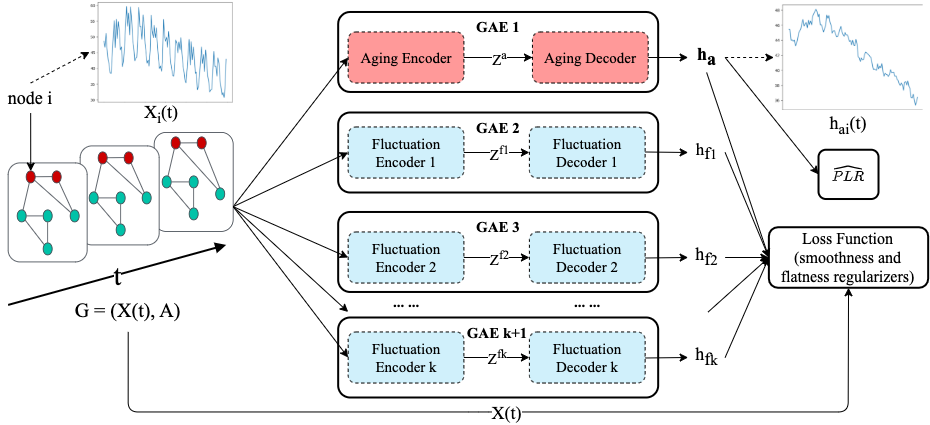

In [17]:
K = 12
d = [ [ 0 for y in range(120) ] for x in range(10) ]
for i in range(10):
  for j in range(120):
    if int(j/K) == i:
      d[i][j] = 1/K
E = torch.as_tensor(d)

W = [ [ 1 for y in range(10) ] for x in range(10) ]
for i in range(10):
  for j in range(10):
    W[i][j] = abs(j-i)
W = torch.as_tensor(W)
# W = W.fill_diagonal_(1)
# E = torch.as_tensor(d)
# L
I = [ 1 for x in range(10) ]
I = torch.as_tensor(I)
L = torch.diag(torch.matmul(W, I), 0) - W

W = W.detach().numpy()
E = E.detach().numpy()
L = L.detach().numpy()

In [ ]:
x = Variable(h)
y = Variable(h)
gamma * ((y.T @ ((E.T @ L) @ E)) @ y)

Expression(UNKNOWN, UNKNOWN, (1,))

In [24]:
from cvxpy import *
import numpy as np
import scipy as sp
from scipy import sparse
import osqp

PLR_KDD = pd.DataFrame()

for i in range(100):

  np.random.seed(1)
  h = 120
  gamma = 100
  ts = data[:,i].detach().numpy()
  x = Variable(h)
  y = Variable(h)

  objective = norm(ts - x - y, 2) + gamma * ((y.T @ ((E.T @ L) @ E)) @ y)

  # Solve with OSQP
  Problem(Minimize(objective)).solve(verbose=True)

  for j in range(120):
    avg = np.average(x.value.reshape(-1, 12), axis=1)
    PLR_KDD.loc[j, i] = x.value[j]

PLR_KDD


                                     CVXPY                                     
                                     v1.3.3                                    
(CVXPY) Jan 26 10:35:05 PM: Your problem has 240 variables, 0 constraints, and 0 parameters.
(CVXPY) Jan 26 10:35:05 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 26 10:35:05 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 26 10:35:05 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jan 26 10:35:05 PM: Compiling problem (target solver=ECOS).
(CVXPY) Jan 26 10:35:05 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,39.994962,40.154191,40.285133,40.306894,39.943583,40.259569,40.432048,40.470302,40.448595,40.697489,...,33.679089,33.661397,33.633782,33.678759,33.695130,33.725365,33.652403,33.656459,33.698685,33.651770
1,37.951661,38.092504,38.208148,38.226929,37.914428,38.188718,38.332927,38.368063,38.344532,38.561361,...,36.237760,36.216834,36.197668,36.238076,36.252681,36.282617,36.210236,36.216251,36.258242,36.214215
2,41.203705,41.317040,41.411647,41.422312,41.167625,41.395042,41.507132,41.531491,41.521062,41.681034,...,35.459087,35.443695,35.425328,35.467133,35.473087,35.500820,35.437460,35.443356,35.479210,35.437816
3,36.792960,36.896992,36.971030,36.986943,36.770926,36.966889,37.061416,37.084400,37.068092,37.204117,...,34.107040,34.086499,34.075291,34.108974,34.118678,34.140663,34.085042,34.088931,34.124227,34.087997
4,33.737600,33.824346,33.894376,33.909778,33.711539,33.876372,33.966830,33.983979,33.972889,34.085645,...,30.123286,30.110880,30.093743,30.125034,30.139863,30.154642,30.105649,30.106327,30.137660,30.103302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,22.375390,21.183888,20.212969,20.046487,22.708438,20.388510,19.137446,18.858207,19.033144,17.224691,...,26.876889,27.049159,27.251178,26.864540,26.715914,26.480161,27.116256,27.067470,26.713011,27.123190
116,23.023975,21.796564,20.796084,20.622634,23.369256,20.980460,19.689312,19.395216,19.578231,17.714882,...,26.821320,26.994869,27.193188,26.806216,26.664854,26.419399,27.061648,27.007875,26.660717,27.068822
117,21.873008,20.689900,19.728751,19.562752,22.203899,19.901034,18.663152,18.383758,18.558155,16.768858,...,31.252858,31.453680,31.692096,31.238733,31.071828,30.790956,31.530633,31.473026,31.065951,31.540132
118,24.907892,23.575485,22.494697,22.310186,25.285322,22.690538,21.290965,20.982057,21.178036,19.160898,...,32.876350,33.088610,33.331134,32.859778,32.685946,32.387472,33.167442,33.105573,32.677972,33.182766


In [25]:
PLR_KDD = PLR_KDD.groupby(np.arange(len(PLR_KDD.index))//12).mean()
first_row = PLR_KDD.iloc[0]
PLR_KDD = PLR_KDD.divide(first_row, axis=1)
PLR_KDD

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.973267,0.966242,0.960155,0.959006,0.975166,0.961267,0.952923,0.950972,0.952146,0.938639,...,0.998342,0.999065,0.999954,0.998277,0.997664,0.996522,0.999340,0.999147,0.997601,0.999382
2,0.935691,0.922558,0.911343,0.909364,0.939247,0.913434,0.898163,0.894631,0.896830,0.872546,...,0.988735,0.990243,0.991963,0.988636,0.987420,0.985298,0.990787,0.990372,0.987333,0.990843
3,0.903261,0.884835,0.869189,0.866370,0.908316,0.872036,0.850905,0.846095,0.849104,0.816179,...,0.979795,0.982021,0.984505,0.979593,0.977784,0.974668,0.982780,0.982204,0.977672,0.982918
4,0.877993,0.854734,0.835104,0.831705,0.884389,0.838767,0.812538,0.806616,0.810320,0.770171,...,0.972317,0.975203,0.978540,0.972063,0.969658,0.965599,0.976315,0.975470,0.969534,0.976401
5,0.847224,0.819833,0.797045,0.793013,0.854781,0.801184,0.770922,0.764049,0.768304,0.722614,...,0.973111,0.976737,0.980897,0.972842,0.969834,0.964684,0.978150,0.977017,0.969654,0.978300
6,0.824806,0.793585,0.767710,0.763240,0.833447,0.772428,0.738425,0.730810,0.735527,0.684988,...,0.956043,0.960268,0.965210,0.955737,0.952224,0.946194,0.961925,0.960651,0.951999,0.962088
7,0.797480,0.763079,0.734812,0.729917,0.807112,0.739945,0.703042,0.694757,0.699910,0.645734,...,0.953788,0.958701,0.964409,0.953417,0.949319,0.942419,0.960538,0.959059,0.949133,0.960787
8,0.771870,0.734652,0.704282,0.699059,0.782301,0.709781,0.670424,0.661658,0.667128,0.610066,...,0.943135,0.948672,0.955090,0.942690,0.938163,0.930349,0.950759,0.949085,0.937946,0.951026
9,0.748408,0.708641,0.676468,0.670923,0.759605,0.682269,0.640848,0.631627,0.637382,0.577942,...,0.941294,0.947470,0.954672,0.940808,0.935688,0.927031,0.949857,0.947995,0.935472,0.950159


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
import matplotlib.transforms as mtransforms
from keras.layers import Dense
from keras.layers import Input
from keras.layers import concatenate
from tensorflow.keras import layers
from keras.models import Model
from keras import regularizers
# from keras.engine.training import Model
from keras.callbacks import ModelCheckpoint
from copy import copy
from tensorflow import sin
from keras.backend import set_value
from numpy.fft import rfft, irfft, rfftfreq
from scipy import pi, signal, fftpack
from datetime import datetime
import glob
import os
import scipy.sparse as sp
import math
import pywt
import matplotlib.pyplot as plt
import numpy as np
import pywt
import warnings
warnings.filterwarnings("ignore")
# from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/St-DynGNN_V1_w_out_PR.drawio.png

## Input

In [13]:
# df1 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_36.1_-107.61.csv', sep=',')
# df2 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_38.49_-108.38.csv', sep=',')
# df3 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_39.86_-107.43.csv', sep=',')
# df4 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_39.74_-107.82.csv', sep=',')
# df5 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_39.17_-103.68.csv', sep=',')

# df1 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_unnoised_PR_36.1_-107.61.csv', sep=',')
# df2 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_unnoised_PR_38.49_-108.38.csv', sep=',')
# df3 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_unnoised_PR_39.86_-107.43.csv', sep=',')
# df4 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_unnoised_PR_39.74_-107.82.csv', sep=',')
# df5 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_unnoised_PR_39.17_-103.68.csv', sep=',')


df1 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_PR_hyperbolic_36.1_-107.61.csv', sep=',')
df2 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_PR_hyperbolic_39.86_-107.43.csv', sep=',')
df3 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_PR_hyperbolic_38.49_-108.38.csv', sep=',')
df4 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_PR_hyperbolic_39.74_-107.82.csv', sep=',')
df5 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_PR_hyperbolic_39.17_-103.68.csv', sep=',')

In [14]:
# # Note that this installation can take a while! Be patient!
# !pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.10.0+${CUDA}.html
# !pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.10.0+${CUDA}.html
# !pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-1.10.0+${CUDA}.html
# !pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-1.10.0+${CUDA}.html
!pip install torch-geometric
# !pip install torch-geometric-temporal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.1 MB/s eta 0:00:00


In [ ]:
df1.columns

Index(['Unnamed: 0', 'ghi', 'wind_direction', 'wind_speed', 'temp_air',
       'albedo', 'pressure', 'Dew Point', 'poa', 'Tcell',
       '36.0864_-107.6322_0.0228702', '36.1014_-107.6733_0.0265725',
       '36.0877_-107.6005_0.0295855', '36.0979_-107.5536_0.0301054',
       '36.1005_-107.5811_0.0218282', '36.0932_-107.5682_0.0290378',
       '36.1154_-107.5995_0.0329381', '36.1147_-107.6019_0.0338114',
       '36.1115_-107.6363_0.0332636', '36.108_-107.5665_0.0389052',
       '36.1189_-107.6232_0.0488941', '36.1054_-107.6377_0.0585679',
       '36.0626_-107.5552_0.0320726', '36.0863_-107.6657_0.0239159',
       '36.0753_-107.6171_0.0214472', '36.0745_-107.5821_0.0245671',
       '36.1007_-107.6361_0.0220451', '36.1277_-107.5925_0.021017',
       '36.0755_-107.5604_0.0189522', '36.0801_-107.668_0.0156882'],
      dtype='object')

In [15]:
from datetime import datetime
#import geopy.distance # to compute distances between stations
import glob
import numpy as np
import os
import pandas as pd
import scipy.sparse as sp
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
#from torch_geometric_temporal.nn import STConv
from tqdm import tqdm
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import ChebConv

Dataset

In [ ]:
# df = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_100sites_5years.csv', sep=',')
# df1 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_36.1_-107.61.csv', sep=',')
# df2 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_38.49_-108.38.csv', sep=',')
# df3 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_39.86_-107.43.csv', sep=',')
# df4 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_39.74_-107.82.csv', sep=',')
# df5 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_39.17_-103.68.csv', sep=',')
# df5.columns[29]

In [16]:
x = pd.concat([df1.iloc[:,10:30],df2.iloc[:,10:30],df3.iloc[:,10:30],df4.iloc[:,10:30],df5.iloc[:,10:30]], axis=1, ignore_index=False)
x = x.fillna(0)
# x = x*100
np.max(x)

36.0864_-107.6322_0.0228702    1.046380
36.1014_-107.6733_0.0265725    1.045189
36.0877_-107.6005_0.0295855    1.046236
36.0979_-107.5536_0.0301054    1.044137
36.1005_-107.5811_0.0218282    1.047541
                                 ...   
39.1736_-103.6255_0.0067788    0.993433
39.1636_-103.6559_0.0047104    0.992525
39.1593_-103.7698_0.0048778    0.994310
39.1708_-103.7034_0.0060138    0.995210
39.1618_-103.6987_0.0046829    0.992784
Length: 100, dtype: float64

SSA

In [26]:
!pip install pyts


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 7.8 MB/s eta 0:00:00


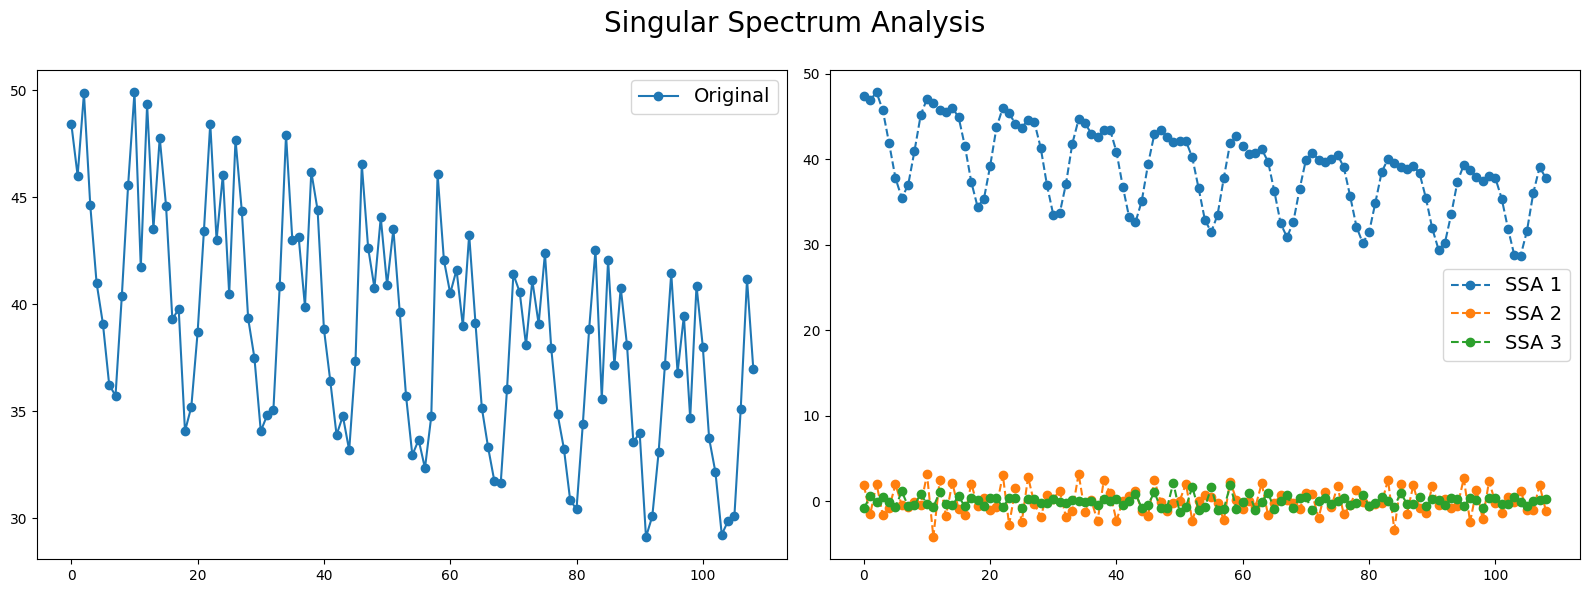

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis

# Parameters
n_samples, n_timestamps = 100, 48

# Toy dataset
# rng = np.random.RandomState(41)
# X = rng.randn(n_samples, n_timestamps)
ts = np.array(data[:,0])
L = 12 # The window length.
K = 120 - 12 + 1 # The number of columns in the trajectory matrix.
# Create the trajectory matrix by pulling the relevant subseries of F, and stacking them as columns.
X = np.column_stack([ts[i:i+L] for i in range(0,K)])

# We decompose the time series into three subseries
window_size = 12
groups = [np.arange(i, i + 5) for i in range(0, 11, 5)]

# Singular Spectrum Analysis
ssa = SingularSpectrumAnalysis(window_size=15, groups=groups)
X_ssa = ssa.fit_transform(X)

# Show the results for the first time series and its subseries
plt.figure(figsize=(16, 6))

ax1 = plt.subplot(121)
ax1.plot(X[0], 'o-', label='Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)
for i in range(len(groups)):
    ax2.plot(X_ssa[0, i], 'o--', label='SSA {0}'.format(i + 1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Singular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis
from pyts.datasets import make_cylinder_bell_funnel

num_rows = 109
num_columns = 100

# Create a DataFrame filled with zeros
ssa_df = pd.DataFrame(0, index=range(num_rows), columns=range(num_columns))


for m in range(100):
  # Parameters
  ts = np.array(data[:,m])
  L = 12 # The window length.
  K = 120 - 12 + 1 # The number of columns in the trajectory matrix.
  # Create the trajectory matrix by pulling the relevant subseries of F, and stacking them as columns.
  X = np.column_stack([ts[i:i+L] for i in range(0,K)])


  # We decompose the time series into three subseries
  window_size = 12
  # Singular Spectrum Analysis
  ssa = SingularSpectrumAnalysis(window_size=window_size, groups="auto")
  X_ssa = ssa.fit_transform(X)
  ssa_df.iloc[:,m] = X_ssa[0, 0]

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


num_rows = 120
num_columns = 100

# Create a DataFrame filled with zeros
MSTL_df = pd.DataFrame(0, index=range(num_rows), columns=range(num_columns))


for m in range(100):
  time_steps = 120
  t = np.arange(time_steps)
  ts = np.array(data[:,m])

  # Create a pandas DataFrame
  df = pd.DataFrame({'Time': t, 'Data': ts})
  df.set_index('Time', inplace=True)

  # Perform seasonal decomposition using LOESS with additive seasonality
  decomposition = seasonal_decompose(df['Data'], model='additive', period=6, two_sided=False)

  # Get the trend component from the decomposition
  trend_component = decomposition.trend
  trend_component[:5] = trend_component[6]
  MSTL_df.iloc[:,m] = trend_component

MSTL_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,43.821407,43.744241,43.674928,43.662808,43.842396,43.689246,43.590739,43.567763,43.582414,43.421141,...,40.745433,40.752477,40.761574,40.746574,40.739177,40.730627,40.755729,40.753315,40.740956,40.757537
1,43.821407,43.744241,43.674928,43.662808,43.842396,43.689246,43.590739,43.567763,43.582414,43.421141,...,40.745433,40.752477,40.761574,40.746574,40.739177,40.730627,40.755729,40.753315,40.740956,40.757537
2,43.821407,43.744241,43.674928,43.662808,43.842396,43.689246,43.590739,43.567763,43.582414,43.421141,...,40.745433,40.752477,40.761574,40.746574,40.739177,40.730627,40.755729,40.753315,40.740956,40.757537
3,43.821407,43.744241,43.674928,43.662808,43.842396,43.689246,43.590739,43.567763,43.582414,43.421141,...,40.745433,40.752477,40.761574,40.746574,40.739177,40.730627,40.755729,40.753315,40.740956,40.757537
4,43.821407,43.744241,43.674928,43.662808,43.842396,43.689246,43.590739,43.567763,43.582414,43.421141,...,40.745433,40.752477,40.761574,40.746574,40.739177,40.730627,40.755729,40.753315,40.740956,40.757537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,35.029610,33.443744,32.146901,31.922180,35.473817,32.381740,30.696000,30.316548,30.555180,28.096620,...,39.427350,39.644139,39.896067,39.411259,39.229898,38.927545,39.728094,39.661499,39.224025,39.739102
116,34.009276,32.460135,31.193924,30.974179,34.443202,31.422889,29.777691,29.407533,29.640642,27.242557,...,38.407356,38.620438,38.867254,38.391489,38.212540,37.916334,38.702544,38.637296,38.207727,38.712411
117,32.718472,31.218602,29.993501,29.780396,33.138206,30.215171,28.624153,28.265744,28.491042,26.173086,...,37.349160,37.558352,37.800324,37.333320,37.157825,36.866861,37.638937,37.575041,37.153200,37.648310
118,31.288370,29.844052,28.664725,28.460178,31.692705,28.878265,27.347966,27.003390,27.219948,24.992181,...,36.929831,37.138687,37.380297,36.914414,36.739395,36.448398,37.218490,37.155801,36.734452,37.228929


In [20]:
location = pd.DataFrame(columns=['latd', 'lond'])
PLR = []

for i in range(10, 30):
  l = df1.columns[i].split('_')
  a = float(l[0])
  b = float(l[1])
  location.loc[i-10] = [a, b]
  PLR.append(float(l[2]))

for i in range(10, 30):
  l = df2.columns[i].split('_')
  a = float(l[0])
  b = float(l[1])
  location.loc[i+10] = [a, b]
  PLR.append(float(l[2]))

for i in range(10, 30):
  l = df3.columns[i].split('_')
  a = float(l[0])
  b = float(l[1])
  location.loc[i+30] = [a, b]
  PLR.append(float(l[2]))

for i in range(10, 30):
  l = df4.columns[i].split('_')
  a = float(l[0])
  b = float(l[1])
  location.loc[i+50] = [a, b]
  PLR.append(float(l[2]))

for i in range(10, 30):
  l = df5.columns[i].split('_')
  a = float(l[0])
  b = float(l[1])
  location.loc[i+70] = [a, b]
  PLR.append(float(l[2]))

PLR = [x*(-1) for x in PLR]
location

,latd,lond
0,36.0864,-107.6322
1,36.1014,-107.6733
2,36.0877,-107.6005
3,36.0979,-107.5536
4,36.1005,-107.5811
...,...,...
95,39.1736,-103.6255
96,39.1636,-103.6559
97,39.1593,-103.7698
98,39.1708,-103.7034


In [21]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

distance = np.zeros(shape=(100,100))
dist = []
for i in range(100):
    for j in range(100):
        d = haversine(location.iloc[i][1], location.iloc[i][0], location.iloc[j][1], location.iloc[j][0])
        distance[i][j] = d
        dist.append(d)

dist_std = np.std(dist)
distance = pd.DataFrame(distance)

# epsilon = 0, 0.25, 0.5, 0.75, 1
epsilon = 0.5
sigma = dist_std
W = np.zeros(shape=(100,100))

for i in range(100):
    for j in range(100):
        if i == j:
            W[i][j] = 0
        else:
            # Compute distance between stations
            d_ij = distance.loc[i][j]

            # Compute weight w_ij
            w_ij = np.exp(-d_ij**2 / sigma**2)

            if w_ij >= epsilon:
                W[i, j] = 1

W = pd.DataFrame(W)
W

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [22]:
# data = torch.FloatTensor(120, 100)
# N = 24*30
# for i in range(120):
#   for j in range(100):
#     # avg = np.mean(x.iloc[i*N:(i+1)*N, j])
#     # data[i][j] = avg
#     M = x.iloc[i*N:(i+1)*N, j].to_numpy()
#     data[i][j] = M[M!=0].mean()

# data = data*100


data = torch.FloatTensor(120, 100)
N = 24*30
for i in range(120):
  for j in range(100):
    # avg = np.mean(x.iloc[i*N:(i+1)*N, j])
    # data[i][j] = avg
    M = x.iloc[i*N:(i+1)*N, j].to_numpy()
    data[i][j] = M[M!=0].mean()

data = data*100

In [ ]:
df1.columns

Index(['Unnamed: 0', 'ghi', 'wind_direction', 'wind_speed', 'temp_air',
       'albedo', 'pressure', 'Dew Point', 'poa', 'Tcell',
       '36.0864_-107.6322_0.0228702', '36.1014_-107.6733_0.0265725',
       '36.0877_-107.6005_0.0295855', '36.0979_-107.5536_0.0301054',
       '36.1005_-107.5811_0.0218282', '36.0932_-107.5682_0.0290378',
       '36.1154_-107.5995_0.0329381', '36.1147_-107.6019_0.0338114',
       '36.1115_-107.6363_0.0332636', '36.108_-107.5665_0.0389052',
       '36.1189_-107.6232_0.0488941', '36.1054_-107.6377_0.0585679',
       '36.0626_-107.5552_0.0320726', '36.0863_-107.6657_0.0239159',
       '36.0753_-107.6171_0.0214472', '36.0745_-107.5821_0.0245671',
       '36.1007_-107.6361_0.0220451', '36.1277_-107.5925_0.021017',
       '36.0755_-107.5604_0.0189522', '36.0801_-107.668_0.0156882'],
      dtype='object')

In [32]:
x = data.T
A = W
G = sp.sparse.coo_matrix(A)
edge_index = torch.tensor(np.array([G.row, G.col]), dtype=torch.int64)
edge_weight = torch.tensor(G.data).float()
torch.max(x)

tensor(51.2937)

In [30]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GATConv, GATv2Conv, GCNConv, TransformerConv, AGNNConv, FusedGATConv, ChebConv, SAGEConv, GraphConv, CuGraphGATConv, TAGConv, GMMConv
from scipy.stats import linregress

class GCN(torch.nn.Module):
  def __init__(self):
    super(GCN, self).__init__()
    torch.manual_seed(42)

    self.conv1 = TransformerConv(120, 60)
    self.conv2 = GATConv(60, 30)
    self.conv3 = TransformerConv(30, 60)
    self.conv4 = GATConv(60, 120)


    self.conv5 = TransformerConv(120, 60)
    self.conv6 = GATConv(60, 30)
    self.conv7 = TransformerConv(30, 60)
    self.conv8 = GATConv(60, 120)



  def forward(self, x, edge_index):
    h_1 = self.conv1(x, edge_index)
    h_2 = self.conv2(h_1, edge_index)
    h_3 = self.conv3(h_2, edge_index)
    h_a = self.conv4(h_3, edge_index)


    h_5 = self.conv5(x, edge_index)
    h_6 = self.conv6(h_5, edge_index)
    h_7 = self.conv7(h_6, edge_index)
    h_f = self.conv8(h_7, edge_index)

    return h_a, h_f

# model = GCN()
# print(model)

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GATConv, GATv2Conv, GCNConv, TransformerConv, AGNNConv, FusedGATConv, ChebConv, SAGEConv, GraphConv, CuGraphGATConv, TAGConv, GMMConv
from scipy.stats import linregress

class GCN(torch.nn.Module):
  def __init__(self):
    super(GCN, self).__init__()
    torch.manual_seed(42)

    self.conv1 = GCNConv(120, 60)
    self.conv2 = GCNConv(60, 30)
    self.conv3 = GCNConv(30, 60)
    self.conv4 = GCNConv(60, 120)


    self.conv5 = GCNConv(120, 60)
    self.conv6 = GCNConv(60, 30)
    self.conv7 = GCNConv(30, 60)
    self.conv8 = GCNConv(60, 120)


  def forward(self, x, edge_index):
    h_1 = self.conv1(x, edge_index)
    h_2 = self.conv2(h_1, edge_index)
    h_3 = self.conv3(h_2, edge_index)
    h_a = self.conv4(h_3, edge_index)


    h_5 = self.conv5(x, edge_index)
    h_6 = self.conv6(h_5, edge_index)
    h_7 = self.conv7(h_6, edge_index)
    h_f = self.conv8(h_7, edge_index)

    return h_a, h_f

# STGAE1 = GCN()
# print(STGAE1)

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GATConv, GATv2Conv, GCNConv, TransformerConv, AGNNConv, FusedGATConv, ChebConv, SAGEConv, GraphConv, CuGraphGATConv, TAGConv, GMMConv
from scipy.stats import linregress

class GCN(torch.nn.Module):
  def __init__(self):
    super(GCN, self).__init__()
    torch.manual_seed(42)

    self.conv1 = GATConv(120, 60)
    self.conv2 = GATConv(60, 30)
    self.conv3 = GATConv(30, 60)
    self.conv4 = GATConv(60, 120)


    self.conv5 = GATConv(120, 60)
    self.conv6 = GATConv(60, 30)
    self.conv7 = GATConv(30, 60)
    self.conv8 = GATConv(60, 120)


  def forward(self, x, edge_index):
    h_1 = self.conv1(x, edge_index)
    h_2 = self.conv2(h_1, edge_index)
    h_3 = self.conv3(h_2, edge_index)
    h_a = self.conv4(h_3, edge_index)


    h_5 = self.conv5(x, edge_index)
    h_6 = self.conv6(h_5, edge_index)
    h_7 = self.conv7(h_6, edge_index)
    h_f = self.conv8(h_7, edge_index)

    return h_a, h_f

# STGAE2 = GCN()
# print(STGAE2)

In [ ]:
# model_save_path1 = os.path.join('gdrive/My Drive/Wavelet_GNN_PLR/Case3_Non_Linear_best_model_STGAE1.pt')
# model_save_path2 = os.path.join('gdrive/My Drive/Wavelet_GNN_PLR/Case3_Non_Linear_best_model_STGAE2.pt')

# torch.save(STGAE1.state_dict(), model_save_path1)
# torch.save(STGAE2.state_dict(), model_save_path2)

In [ ]:
from sklearn.metrics import mean_squared_error
import torch
import tensorflow as tf
import torch.nn.functional as F

# Lambda1 = 0.1
# Lambda2 = 250
# Lambda3 = 1

Lambda1 = 0
Lambda2 = 250
Lambda3 = 1

m1 = [[1] for i in range(1,121)]
m2 = [[i] for i in range(1,121)]
m = torch.Tensor([m1, m2])
m = torch.squeeze(m).T

K = 12
d = [ [ 0 for y in range(120) ] for x in range(10) ]
for i in range(10):
  for j in range(120):
    if int(j/K) == i:
      d[i][j] = 1/K
E = torch.as_tensor(d)

W = [ [ 1 for y in range(10) ] for x in range(10) ]
for i in range(10):
  for j in range(10):
    W[i][j] = abs(j-i)
W = torch.as_tensor(W)
W = W.fill_diagonal_(1)


I = [ 1 for x in range(10) ]
I = torch.as_tensor(I)
L = torch.diag(torch.matmul(W, I), 0) - W

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay= 0.02)


def train(x, edge_index, Lambda1, Lambda2):
  optimizer.zero_grad()
  h_a, h_f = model(x, edge_index)
  loss = criterion(h_a+h_f, x)  + \
  0*torch.std(torch.diff(h_a)) +\
  Lambda1 * torch.var(h_a) +\
  Lambda2 * torch.sum(torch.abs(torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(h_f, 0, 1))[1])) +\
  Lambda3 * torch.sum(torch.diagonal(torch.matmul(torch.matmul(torch.matmul(h_f, E.T).long(), L.long()), torch.matmul(E, h_f.T).long()), 0))

  print(criterion(h_a + h_f, x))
  print(torch.std(torch.diff(h_a)))
  print(torch.var(h_a))
  print(torch.sum(torch.abs(torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(h_f, 0, 1))[1])))
  print(torch.sum(torch.diagonal(torch.matmul(torch.matmul(torch.matmul(h_f, E.T).long(), L.long()), torch.matmul(E, h_f.T).long()), 0)))

  loss.backward()
  optimizer.step()
  return loss, criterion(h_a+h_f, x), h_a, h_f

epochs = range(1, 500)
losses = []
embeddings = []
min_loss = 1000
for epoch in epochs:
  loss, loss_2, h_a, h_f= train(x, edge_index, Lambda1, Lambda2)
  losses.append(loss)
  print(f"Epoch: {epoch}\tLoss: {loss:.4f}")
  # if loss_2 < 100:
  #   break


tensor(2212.7100, grad_fn=<MseLossBackward0>)
tensor(24.7903, grad_fn=<StdBackward0>)
tensor(330.9861, grad_fn=<VarBackward0>)
tensor(2.2513, grad_fn=<SumBackward0>)
tensor(1060072)
Epoch: 1	Loss: 1062847.5000
tensor(16886.0586, grad_fn=<MseLossBackward0>)
tensor(124.9344, grad_fn=<StdBackward0>)
tensor(7656.0908, grad_fn=<VarBackward0>)
tensor(18.1932, grad_fn=<SumBackward0>)
tensor(12662861)
Epoch: 2	Loss: 12684295.0000
tensor(29640.4023, grad_fn=<MseLossBackward0>)
tensor(63.0072, grad_fn=<StdBackward0>)
tensor(2141.4106, grad_fn=<VarBackward0>)
tensor(303.9405, grad_fn=<SumBackward0>)
tensor(705224342)
Epoch: 3	Loss: 705329920.0000
tensor(6576.9829, grad_fn=<MseLossBackward0>)
tensor(68.2727, grad_fn=<StdBackward0>)
tensor(2474.7092, grad_fn=<VarBackward0>)
tensor(90.1424, grad_fn=<SumBackward0>)
tensor(62179266)
Epoch: 4	Loss: 62208376.0000
tensor(7773.9658, grad_fn=<MseLossBackward0>)
tensor(73.1429, grad_fn=<StdBackward0>)
tensor(2702.5986, grad_fn=<VarBackward0>)
tensor(78.1830

In [ ]:
from sklearn.metrics import mean_squared_error
import torch
import tensorflow as tf
import torch.nn.functional as F

# Lambda1 = 0.1
# Lambda2 = 250
# Lambda3 = 1

Lambda1 = 0
Lambda2 = 250
Lambda3 = 1

m1 = [[1] for i in range(1,121)]
m2 = [[i] for i in range(1,121)]
m = torch.Tensor([m1, m2])
m = torch.squeeze(m).T

K = 12
d = [ [ 0 for y in range(120) ] for x in range(10) ]
for i in range(10):
  for j in range(120):
    if int(j/K) == i:
      d[i][j] = 1/K
E = torch.as_tensor(d)

W = [ [ 1 for y in range(10) ] for x in range(10) ]
for i in range(10):
  for j in range(10):
    W[i][j] = abs(j-i)
W = torch.as_tensor(W)
W = W.fill_diagonal_(1)


I = [ 1 for x in range(10) ]
I = torch.as_tensor(I)
L = torch.diag(torch.matmul(W, I), 0) - W

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay= 0.02)


def train(x, edge_index, Lambda1, Lambda2):
  optimizer.zero_grad()
  h_a, h_f = model(x, edge_index)
  loss = criterion(h_a+h_f, x)  + \
  10*torch.std(torch.diff(h_a)) +\
  Lambda1 * torch.var(h_a) +\
  Lambda2 * torch.sum(torch.abs(torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(h_f, 0, 1))[1])) +\
  Lambda3 * torch.sum(torch.diagonal(torch.matmul(torch.matmul(torch.matmul(h_f, E.T).long(), L.long()), torch.matmul(E, h_f.T).long()), 0))

  print(criterion(h_a + h_f, x))
  print(torch.std(torch.diff(h_a)))
  print(torch.var(h_a))
  print(torch.sum(torch.abs(torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(h_f, 0, 1))[1])))
  print(torch.sum(torch.diagonal(torch.matmul(torch.matmul(torch.matmul(h_f, E.T).long(), L.long()), torch.matmul(E, h_f.T).long()), 0)))

  loss.backward()
  optimizer.step()
  return loss, criterion(h_a+h_f, x), h_a, h_f

epochs = range(1, 904)
losses = []
embeddings = []
min_loss = 1000
for epoch in epochs:
  loss, loss_2, h_a, h_f= train(x, edge_index, Lambda1, Lambda2)
  losses.append(loss)
  print(f"Epoch: {epoch}\tLoss: {loss:.4f}")
  # if loss_2 < 100:
  #   break


In [ ]:
from sklearn.metrics import mean_squared_error
import torch
import tensorflow as tf
import torch.nn.functional as F

# Lambda1 = 0.1
# Lambda2 = 250
# Lambda3 = 1

Lambda1 = 0
Lambda2 = 100
Lambda3 = 5

m1 = [[1] for i in range(1,121)]
m2 = [[i] for i in range(1,121)]
m = torch.Tensor([m1, m2])
m = torch.squeeze(m).T

K = 12
d = [ [ 0 for y in range(120) ] for x in range(10) ]
for i in range(10):
  for j in range(120):
    if int(j/K) == i:
      d[i][j] = 1/K
E = torch.as_tensor(d)

W = [ [ 1 for y in range(10) ] for x in range(10) ]
for i in range(10):
  for j in range(10):
    W[i][j] = abs(j-i)
W = torch.as_tensor(W)
W = W.fill_diagonal_(1)


I = [ 1 for x in range(10) ]
I = torch.as_tensor(I)
L = torch.diag(torch.matmul(W, I), 0) - W

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay= 0.02)


def train(x, edge_index, Lambda1, Lambda2):
  optimizer.zero_grad()
  h_a, h_f = model(x, edge_index)
  loss = criterion(h_a+h_f, x)  + \
  10*torch.std(torch.diff(h_a)) +\
  Lambda1 * torch.var(h_a) +\
  Lambda2 * torch.sum(torch.abs(torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(h_f, 0, 1))[1])) +\
  Lambda3 * torch.sum(torch.diagonal(torch.matmul(torch.matmul(torch.matmul(h_f, E.T).long(), L.long()), torch.matmul(E, h_f.T).long()), 0))

  print(criterion(h_a + h_f, x))
  print(torch.std(torch.diff(h_a)))
  print(torch.var(h_a))
  print(torch.sum(torch.abs(torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(h_f, 0, 1))[1])))
  print(torch.sum(torch.diagonal(torch.matmul(torch.matmul(torch.matmul(h_f, E.T).long(), L.long()), torch.matmul(E, h_f.T).long()), 0)))

  loss.backward()
  optimizer.step()
  return loss, criterion(h_a+h_f, x), h_a, h_f

epochs = range(1, 990)
losses = []
embeddings = []
min_loss = 1000
for epoch in epochs:
  loss, loss_2, h_a, h_f= train(x, edge_index, Lambda1, Lambda2)
  losses.append(loss)
  print(f"Epoch: {epoch}\tLoss: {loss:.4f}")
  # if loss_2 < 100:
  #   break


Streaming output truncated to the last 5000 lines.
tensor(21659)
Epoch: 167	Loss: 108362.8438
tensor(27.1718, grad_fn=<MseLossBackward0>)
tensor(2.1015, grad_fn=<StdBackward0>)
tensor(16.6550, grad_fn=<VarBackward0>)
tensor(0.1881, grad_fn=<SumBackward0>)
tensor(29020)
Epoch: 168	Loss: 145167.0000
tensor(28.5053, grad_fn=<MseLossBackward0>)
tensor(2.1103, grad_fn=<StdBackward0>)
tensor(18.7760, grad_fn=<VarBackward0>)
tensor(0.2137, grad_fn=<SumBackward0>)
tensor(17258)
Epoch: 169	Loss: 86360.9766
tensor(23.9652, grad_fn=<MseLossBackward0>)
tensor(2.4659, grad_fn=<StdBackward0>)
tensor(18.8305, grad_fn=<VarBackward0>)
tensor(0.1743, grad_fn=<SumBackward0>)
tensor(6433)
Epoch: 170	Loss: 32231.0547
tensor(27.4712, grad_fn=<MseLossBackward0>)
tensor(3.0063, grad_fn=<StdBackward0>)
tensor(19.9301, grad_fn=<VarBackward0>)
tensor(0.1155, grad_fn=<SumBackward0>)
tensor(11687)
Epoch: 171	Loss: 58504.0859
tensor(27.7829, grad_fn=<MseLossBackward0>)
tensor(2.3198, grad_fn=<StdBackward0>)
tensor(

In [ ]:
from sklearn.metrics import mean_squared_error
import torch
import tensorflow as tf
import torch.nn.functional as F

# Lambda1 = 0.1
# Lambda2 = 250
# Lambda3 = 1

Lambda1 = 0
Lambda2 = 50
Lambda3 = 0

m1 = [[1] for i in range(1,121)]
m2 = [[i] for i in range(1,121)]
m = torch.Tensor([m1, m2])
m = torch.squeeze(m).T

K = 12
d = [ [ 0 for y in range(120) ] for x in range(10) ]
for i in range(10):
  for j in range(120):
    if int(j/K) == i:
      d[i][j] = 1/K
E = torch.as_tensor(d)

W = [ [ 1 for y in range(10) ] for x in range(10) ]
for i in range(10):
  for j in range(10):
    W[i][j] = abs(j-i)
W = torch.as_tensor(W)
W = W.fill_diagonal_(1)


I = [ 1 for x in range(10) ]
I = torch.as_tensor(I)
L = torch.diag(torch.matmul(W, I), 0) - W

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay= 0.02)


def train(x, edge_index, Lambda1, Lambda2):
  optimizer.zero_grad()
  h_a, h_f = model(x, edge_index)
  loss = criterion(h_a+h_f, x)  + \
  10*torch.std(torch.diff(h_a)) +\
  Lambda1 * torch.var(h_a) +\
  Lambda2 * torch.sum(torch.abs(torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(h_f, 0, 1))[1])) +\
  Lambda3 * torch.sum(torch.diagonal(torch.matmul(torch.matmul(torch.matmul(h_f, E.T).long(), L.long()), torch.matmul(E, h_f.T).long()), 0))

  print(criterion(h_a + h_f, x))
  print(torch.std(torch.diff(h_a)))
  print(torch.var(h_a))
  print(torch.sum(torch.abs(torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(h_f, 0, 1))[1])))
  print(torch.sum(torch.diagonal(torch.matmul(torch.matmul(torch.matmul(h_f, E.T).long(), L.long()), torch.matmul(E, h_f.T).long()), 0)))

  loss.backward()
  optimizer.step()
  return loss, criterion(h_a+h_f, x), h_a, h_f

epochs = range(1, 990)
losses = []
embeddings = []
min_loss = 1000
for epoch in epochs:
  loss, loss_2, h_a, h_f= train(x, edge_index, Lambda1, Lambda2)
  losses.append(loss)
  print(f"Epoch: {epoch}\tLoss: {loss:.4f}")
  # if loss_2 < 100:
  #   break


Streaming output truncated to the last 5000 lines.
tensor(59919)
Epoch: 156	Loss: 51.5660
tensor(28.4482, grad_fn=<MseLossBackward0>)
tensor(2.3419, grad_fn=<StdBackward0>)
tensor(14.9523, grad_fn=<VarBackward0>)
tensor(0.2516, grad_fn=<SumBackward0>)
tensor(48859)
Epoch: 157	Loss: 64.4482
tensor(26.2534, grad_fn=<MseLossBackward0>)
tensor(2.0173, grad_fn=<StdBackward0>)
tensor(14.8325, grad_fn=<VarBackward0>)
tensor(0.0758, grad_fn=<SumBackward0>)
tensor(55125)
Epoch: 158	Loss: 50.2161
tensor(31.5110, grad_fn=<MseLossBackward0>)
tensor(2.1910, grad_fn=<StdBackward0>)
tensor(13.9669, grad_fn=<VarBackward0>)
tensor(0.3314, grad_fn=<SumBackward0>)
tensor(78581)
Epoch: 159	Loss: 69.9911
tensor(28.9727, grad_fn=<MseLossBackward0>)
tensor(1.6896, grad_fn=<StdBackward0>)
tensor(14.6616, grad_fn=<VarBackward0>)
tensor(0.2065, grad_fn=<SumBackward0>)
tensor(64884)
Epoch: 160	Loss: 56.1959
tensor(26.1268, grad_fn=<MseLossBackward0>)
tensor(1.8412, grad_fn=<StdBackward0>)
tensor(13.4562, grad_fn

In [ ]:
# from sklearn.metrics import mean_squared_error
# import torch
# import tensorflow as tf
# import torch.nn.functional as F

# # Lambda1 = 0
# # Lambda2 = 250
# # Lambda3 = 1

# Lambda1 = 0
# Lambda2 = 250
# Lambda3 = 1

# # Lambda1 = 0
# # Lambda2 = 0
# # Lambda3 = 0

# m1 = [[1] for i in range(1,121)]
# m2 = [[i] for i in range(1,121)]
# m = torch.Tensor([m1, m2])
# m = torch.squeeze(m).T

# K = 12
# d = [ [ 0 for y in range(120) ] for x in range(10) ]
# for i in range(10):
#   for j in range(120):
#     if int(j/K) == i:
#       d[i][j] = 1/K
# E = torch.as_tensor(d)

# W = [ [ 1 for y in range(10) ] for x in range(10) ]
# for i in range(10):
#   for j in range(10):
#     W[i][j] = abs(j-i)
# W = torch.as_tensor(W)
# W = W.fill_diagonal_(1)


# I = [ 1 for x in range(10) ]
# I = torch.as_tensor(I)
# L = torch.diag(torch.matmul(W, I), 0) - W

# criterion = torch.nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay= 0.02)


# def train(x, edge_index, Lambda1, Lambda2):
#   optimizer.zero_grad()
#   h_a, h_f = model(x, edge_index)
#   loss = criterion(h_a+h_f, x)  + \
#   torch.std(torch.diff(h_a)) +\
#   torch.abs(torch.mean(h_f)) +\
#   Lambda1 * torch.var(h_a) +\
#   Lambda2 * torch.sum(torch.abs(torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(h_f, 0, 1))[1])) +\
#   Lambda3 * torch.sum(torch.diagonal(torch.matmul(torch.matmul(torch.matmul(h_f, E.T).long(), L.long()), torch.matmul(E, h_f.T).long()), 0))

#   print(criterion(h_a + h_f, x))
#   print(torch.std(torch.diff(h_a)))
#   print(torch.var(h_a))
#   print(torch.sum(torch.abs(torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(h_f, 0, 1))[1])))
#   print(torch.sum(torch.diagonal(torch.matmul(torch.matmul(torch.matmul(h_f, E.T).long(), L.long()), torch.matmul(E, h_f.T).long()), 0)))

#   loss.backward()
#   optimizer.step()
#   return loss, criterion(h_a+h_f, x), h_a, h_f

# epochs = range(1, 501)
# losses = []
# embeddings = []
# min_loss = 1000
# for epoch in epochs:
#   loss, loss_2, h_a, h_f= train(x, edge_index, Lambda1, Lambda2)
#   losses.append(loss)
#   print(f"Epoch: {epoch}\tLoss: {loss:.4f}")
#   # if loss_2 < 100:
#   #   break


In [ ]:
torch.diagonal(torch.matmul(torch.matmul(torch.matmul(h_f, E.T).long(), L.long()), torch.matmul(E, h_f.T).long()), 0)

tensor([ 82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,
         82,  82,  82,  82,  82,  82, 158, 158, 158, 158, 158, 158, 158, 158,
        158, 158, 158, 158, 158, 158, 158, 158, 158, 158, 158, 158,  82,  82,
         82,  82,  82,  95,  82,  95,  82,  82,  82,  82,  82,  95,  82,  82,
         82,  82,  95,  82, 158, 158, 158, 158, 158, 158,  95, 158, 158, 158,
        158, 158,  95, 158, 158, 158, 158,  95, 158, 158,  25,  25,  25,  25,
         25,  25,  25,  25,  25,  25,  25,  25,  25,  25,  25,  25,  25,  25,
         25,  25])

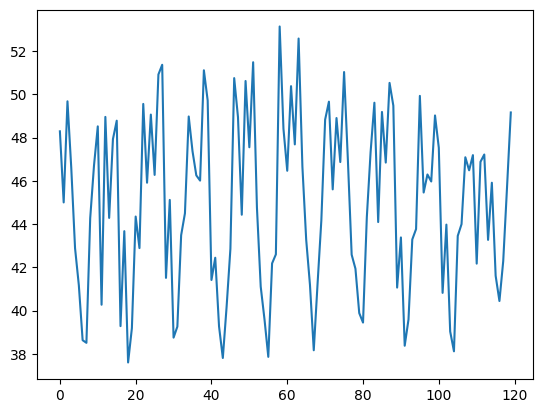

In [ ]:
plt.plot((h_f[0]+torch.mean(h_a[0])).detach().numpy())

In [ ]:
type(x[15].detach().numpy())

numpy.ndarray

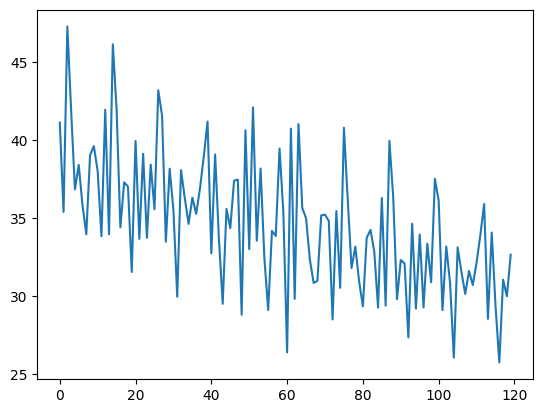

In [ ]:
plt.plot(x[20].detach().numpy())

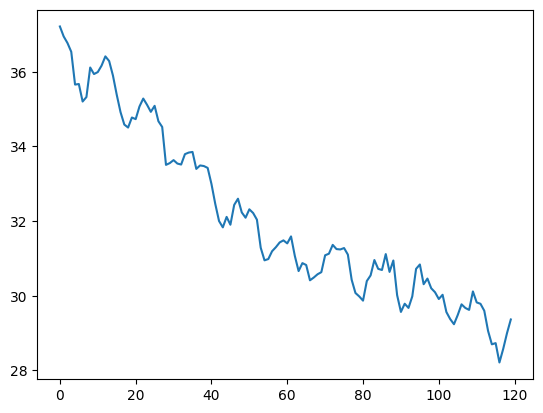

In [ ]:
plt.plot((h_a[20]).detach().numpy())

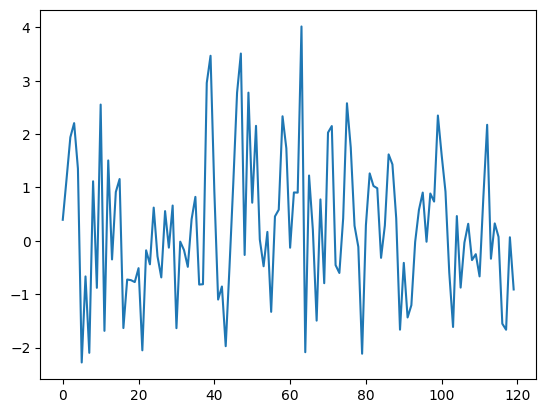

In [ ]:
plt.plot((h_f[15]).detach().numpy())

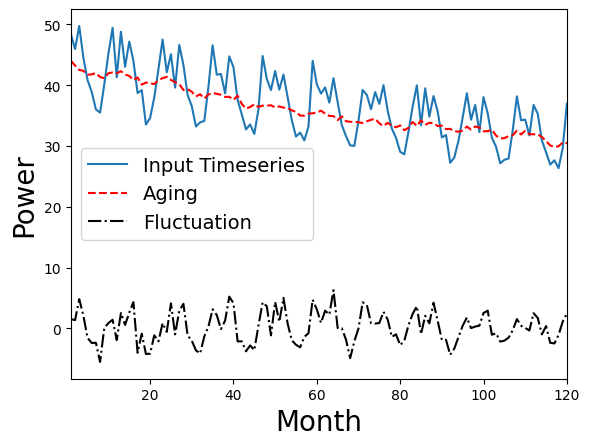

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
L = [[i] for i in range(1,121)]

# plot lines
plt.plot(L, x[5].detach().numpy(), label = "Input Timeseries", linestyle="-")
plt.plot(L, h_a[5].detach().numpy(), label = "Aging", linestyle="--", color = 'red')
plt.plot(L, h_f[5].detach().numpy(), label = "Fluctuation", linestyle="-.", color = 'black')
# plt.legend()
# plt.show()
plt.legend(fontsize = 14)
plt.margins(x=0)
plt.xlabel('Month',fontsize = 20)
plt.ylabel('Power',fontsize = 20)
plt.savefig("gdrive/My Drive/Wavelet_GNN_PLR/V5_aging_fluctuation.png",transparent=True, dpi=1000)
plt.show()

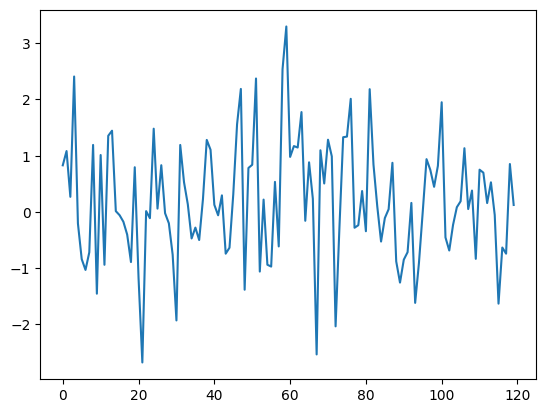

In [ ]:
plt.plot((h_f[10]).detach().numpy())

In [ ]:
# torch.var(x[0]-h_f[0])
torch.var(h_a[0])

tensor(16.1928, grad_fn=<VarBackward0>)

In [ ]:
m1 = [[1] for i in range(1,121)]
m2 = [[i] for i in range(1,121)]
m = torch.Tensor([m1, m2])
m = torch.squeeze(m).T

PLR_calc = torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(h_a, 0, 1))
PLR_calc

tensor([[ 4.2874e+01,  4.2874e+01,  4.2874e+01,  4.2874e+01,  4.2874e+01,
          4.2874e+01,  4.2874e+01,  4.2874e+01,  4.2874e+01,  4.2874e+01,
          4.0737e+01,  3.8702e+01,  4.2990e+01,  4.3689e+01,  4.3862e+01,
          4.3639e+01,  4.3820e+01,  4.3889e+01,  4.4020e+01,  4.4206e+01,
          3.8691e+01,  3.8503e+01,  3.8485e+01,  3.7579e+01,  3.8356e+01,
          3.8867e+01,  3.8899e+01,  3.8750e+01,  3.8551e+01,  3.8456e+01,
          3.7823e+01,  3.8826e+01,  3.8818e+01,  3.8893e+01,  3.8511e+01,
          3.8865e+01,  3.8859e+01,  3.8752e+01,  3.8677e+01,  3.8919e+01,
          4.1763e+01,  4.1833e+01,  4.1906e+01,  4.1889e+01,  4.1891e+01,
          4.1902e+01,  4.1882e+01,  4.1899e+01,  4.1931e+01,  4.1924e+01,
          4.1931e+01,  4.1926e+01,  4.1916e+01,  4.1876e+01,  4.1900e+01,
          4.1896e+01,  4.1904e+01,  4.1902e+01,  4.1889e+01,  4.1881e+01,
          3.6487e+01,  3.7488e+01,  3.5035e+01,  3.3805e+01,  2.8111e+01,
          3.6010e+01,  3.6953e+01,  3.

In [136]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GATConv, GATv2Conv, GCNConv, TransformerConv, AGNNConv, FusedGATConv, ChebConv, SAGEConv, GraphConv, CuGraphGATConv, TAGConv, GMMConv
from scipy.stats import linregress

class GCN(torch.nn.Module):
  def __init__(self):
    super(GCN, self).__init__()
    torch.manual_seed(42)

    self.conv1 = TransformerConv(120, 60)
    self.conv2 = GATConv(60, 30)
    self.conv3 = TransformerConv(30, 60)
    self.conv4 = GATConv(60, 120)


    self.conv5 = TransformerConv(120, 60)
    self.conv6 = GATConv(60, 30)
    self.conv7 = TransformerConv(30, 60)
    self.conv8 = GATConv(60, 120)



  def forward(self, x, edge_index):
    h_1 = self.conv1(x, edge_index)
    h_2 = self.conv2(h_1, edge_index)
    h_3 = self.conv3(h_2, edge_index)
    h_a = self.conv4(h_3, edge_index)


    h_5 = self.conv5(x, edge_index)
    h_6 = self.conv6(h_5, edge_index)
    h_7 = self.conv7(h_6, edge_index)
    h_f = self.conv8(h_7, edge_index)

    return h_a, h_f

model = GCN()
model_save_path = os.path.join('gdrive/My Drive/Wavelet_GNN_PLR/Case2_Linear_W_BP_best_model_STGAE_NS.pt')
model.load_state_dict(torch.load(model_save_path))
model.eval()
h_a, h_f = model(x, edge_index)



PLR_matrix = (x-h_f).T
PLR_matrix.shape

torch.Size([120, 100])

In [129]:
model = GCN()
model_save_path = os.path.join('gdrive/My Drive/Wavelet_GNN_PLR/Case3_Non_Linear_best_model_STGAE_NS.pt')
model.load_state_dict(torch.load(model_save_path))
model.eval()
h_a, h_f = model(x, edge_index)



PLR_matrix = (x-h_f).T
PLR_matrix.shape

torch.Size([120, 100])

In [ ]:
# model_save_path1 = os.path.join('gdrive/My Drive/Wavelet_GNN_PLR/Case3_Non_Linear_best_model_STGAE1.pt')
# model_save_path2 = os.path.join('gdrive/My Drive/Wavelet_GNN_PLR/Case3_Non_Linear_best_model_STGAE2.pt')

In [112]:
# model = GCN()
# model_save_path = os.path.join('gdrive/My Drive/Wavelet_GNN_PLR/Case3_Non_Linear_best_model_STGAE1.pt')
# model.load_state_dict(torch.load(model_save_path))
# model.eval()
# h_a, h_f = model(x, edge_index)



# PLR_matrix_STGAE1 = (x-h_f).T
# PLR_matrix_STGAE1.shape


import torch
from torch.nn import Linear
from torch_geometric.nn import GATConv, GATv2Conv, GCNConv, TransformerConv, AGNNConv, FusedGATConv, ChebConv, SAGEConv, GraphConv, CuGraphGATConv, TAGConv, GMMConv
from scipy.stats import linregress

class GCN(torch.nn.Module):
  def __init__(self):
    super(GCN, self).__init__()
    torch.manual_seed(42)

    self.conv1 = GCNConv(120, 60)
    self.conv2 = GCNConv(60, 30)
    self.conv3 = GCNConv(30, 60)
    self.conv4 = GCNConv(60, 120)


    self.conv5 = GCNConv(120, 60)
    self.conv6 = GCNConv(60, 30)
    self.conv7 = GCNConv(30, 60)
    self.conv8 = GCNConv(60, 120)


  def forward(self, x, edge_index):
    h_1 = self.conv1(x, edge_index)
    h_2 = self.conv2(h_1, edge_index)
    h_3 = self.conv3(h_2, edge_index)
    h_a = self.conv4(h_3, edge_index)


    h_5 = self.conv5(x, edge_index)
    h_6 = self.conv6(h_5, edge_index)
    h_7 = self.conv7(h_6, edge_index)
    h_f = self.conv8(h_7, edge_index)

    return h_a, h_f


model = GCN()
model_save_path = os.path.join('gdrive/My Drive/Wavelet_GNN_PLR/Case3_Non_Linear_best_model_STGAE1.pt')
model.load_state_dict(torch.load(model_save_path))
model.eval()
h_a, h_f = model(x, edge_index)



PLR_matrix_STGAE1 = (x-h_f).T
PLR_matrix_STGAE1.shape


torch.Size([120, 100])

In [102]:
# model = GCN()
# model_save_path = os.path.join('gdrive/My Drive/Wavelet_GNN_PLR/Case3_Non_Linear_best_model_STGAE2.pt')
# model.load_state_dict(torch.load(model_save_path))
# model.eval()
# h_a, h_f = model(x, edge_index)



# PLR_matrix_STGAE2 = (x-h_f).T
# PLR_matrix_STGAE2.shape



import torch
from torch.nn import Linear
from torch_geometric.nn import GATConv, GATv2Conv, GCNConv, TransformerConv, AGNNConv, FusedGATConv, ChebConv, SAGEConv, GraphConv, CuGraphGATConv, TAGConv, GMMConv
from scipy.stats import linregress

class GCN(torch.nn.Module):
  def __init__(self):
    super(GCN, self).__init__()
    torch.manual_seed(42)

    self.conv1 = GATConv(120, 60)
    self.conv2 = GATConv(60, 30)
    self.conv3 = GATConv(30, 60)
    self.conv4 = GATConv(60, 120)


    self.conv5 = GATConv(120, 60)
    self.conv6 = GATConv(60, 30)
    self.conv7 = GATConv(30, 60)
    self.conv8 = GATConv(60, 120)


  def forward(self, x, edge_index):
    h_1 = self.conv1(x, edge_index)
    h_2 = self.conv2(h_1, edge_index)
    h_3 = self.conv3(h_2, edge_index)
    h_a = self.conv4(h_3, edge_index)


    h_5 = self.conv5(x, edge_index)
    h_6 = self.conv6(h_5, edge_index)
    h_7 = self.conv7(h_6, edge_index)
    h_f = self.conv8(h_7, edge_index)

    return h_a, h_f


model = GCN()
model_save_path = os.path.join('gdrive/My Drive/Wavelet_GNN_PLR/Case3_Non_Linear_best_model_STGAE2.pt')
model.load_state_dict(torch.load(model_save_path))
model.eval()
h_a, h_f = model(x, edge_index)



PLR_matrix_STGAE2 = (x-h_f).T
PLR_matrix_STGAE2.shape


torch.Size([120, 100])

In [ ]:
PLR_matrix = (x-h_f).T
PLR_matrix.shape

torch.Size([120, 100])

In [ ]:
PLR_dense = torch.FloatTensor(10, 100)
PLR_matrix
for j in range(100):
  PLR_inverter = []
  for i in range(10):
    PLR_dense[i][j] = torch.mean(PLR_matrix[12*i:12*(i+1),j])

# PLR_dense

In [ ]:
m1 = [[1] for i in range(1,11)]
m2 = [[i] for i in range(1,11)]
m = torch.Tensor([m1, m2])
m = torch.squeeze(m).T

PLR_calc = torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(PLR_dense.T, 0, 1))
PLR_calc

tensor([[43.4525, 43.4525, 43.4525, 43.4525, 43.4525, 43.4525, 43.4525, 43.4525,
         43.4525, 43.4525, 41.5676, 39.6674, 43.5564, 44.1212, 44.2528, 44.0815,
         44.2204, 44.2728, 44.3694, 44.5007, 39.0737, 38.9251, 38.9109, 38.1558,
         38.8077, 39.2072, 39.2311, 39.1182, 38.9628, 38.8877, 38.3647, 39.1765,
         39.1702, 39.2273, 38.9311, 39.2063, 39.2007, 39.1204, 39.0626, 39.2457,
         41.8536, 41.8852, 41.9114, 41.9041, 41.9066, 41.9094, 41.9043, 41.9080,
         41.9177, 41.9151, 41.9187, 41.9168, 41.9145, 41.9022, 41.9104, 41.9090,
         41.9119, 41.9097, 41.9067, 41.9030, 37.3170, 38.2324, 35.9541, 34.7779,
         29.1739, 36.8730, 37.7460, 38.2046, 39.6827, 39.5893, 39.7462, 39.7383,
         39.7864, 40.1240, 40.0208, 39.9921, 39.6929, 39.4527, 39.4553, 39.8343,
         40.6235, 40.9270, 41.1187, 41.1658, 41.1524, 41.1141, 41.0574, 41.0129,
         41.2764, 41.3025, 41.3216, 41.3315, 41.3433, 41.3238, 41.3124, 41.2972,
         41.3369, 41.3325, 4

In [ ]:
PLR_calc.shape
PLR_derived = []

for i in range(100):
  P = (PLR_calc[0][i] + 10*PLR_calc[1][i] - PLR_calc[0][i])/ (PLR_calc[0][i]*10)
  PLR_derived.append(P.detach().numpy())


In [ ]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(PLR, PLR_derived)
y_true, y_pred = np.array(PLR), np.array(PLR_derived)
print("PLR MAE of 100 simulated inverters is: "+ str(error))
print("PLR MAPE of 100 simulated inverters is: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

PLR MAE of 100 simulated inverters is: 0.0007170558349585233
PLR MAPE of 100 simulated inverters is: 6.854666524710412%


In [ ]:
# model_save_path = os.path.join('gdrive/My Drive/Wavelet_GNN_PLR/Case3__Non_Linear_best_model_v2_NF.pt')
# torch.save(model.state_dict(), model_save_path)

### Compare shape of EDP (esimtated degradation pattern) and RDP

In [114]:
import pandas as pd

RDP = pd.DataFrame()
index = list(range(0, 87601,720))[:120]

def plr_hyperbolic_scale(scale, plr, ts_yrs = 10, sample_rate = 24):
  a_cons = ((1 / (1 - plr * ts_yrs)) - 1 )/ (365 * sample_rate * ts_yrs)
  return (1 / (a_cons * scale + 1))

index = range(0, 87601,720)

for j in range(100):
  for i in range(120):
    RDP.loc[i,j] = plr_hyperbolic_scale(index[i], -PLR[j],10,24)

RDP = RDP.groupby(np.arange(len(RDP.index))//12).mean()
first_row = RDP.iloc[0]
RDP = RDP.divide(first_row, axis=1)
RDP

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.971947,0.966066,0.960911,0.959985,0.973519,0.961875,0.954738,0.953047,0.954112,0.942430,...,0.994325,0.994928,0.995628,0.994274,0.993768,0.992902,0.995159,0.994979,0.993747,0.995188
2,0.945425,0.934360,0.924763,0.923050,0.948405,0.926550,0.913396,0.910307,0.912251,0.891129,...,0.988714,0.989908,0.991293,0.988613,0.987613,0.985904,0.990364,0.990009,0.987571,0.990423
3,0.920313,0.904670,0.891237,0.888851,0.924554,0.893728,0.875486,0.871236,0.873909,0.845126,...,0.983166,0.984938,0.986997,0.983016,0.981534,0.979004,0.985616,0.985088,0.981471,0.985703
4,0.896500,0.876808,0.860057,0.857097,0.901874,0.863152,0.840599,0.835381,0.838661,0.803641,...,0.977679,0.980017,0.982737,0.977483,0.975529,0.972200,0.980913,0.980215,0.975447,0.981027
5,0.873888,0.850611,0.830984,0.827533,0.880279,0.834599,0.808385,0.802361,0.806147,0.766038,...,0.972254,0.975146,0.978514,0.972011,0.969597,0.965490,0.976254,0.975391,0.969496,0.976396
6,0.852389,0.825934,0.803814,0.799941,0.859695,0.807875,0.778550,0.771853,0.776059,0.731798,...,0.966889,0.970322,0.974328,0.966600,0.963737,0.958872,0.971640,0.970614,0.963617,0.971808
7,0.831922,0.802649,0.778364,0.774130,0.840051,0.782810,0.750838,0.743580,0.748137,0.700488,...,0.961582,0.965546,0.970176,0.961249,0.957947,0.952344,0.967069,0.965883,0.957809,0.967263
8,0.812415,0.780641,0.754476,0.749933,0.821285,0.759253,0.725032,0.717305,0.722155,0.671748,...,0.956333,0.960817,0.966060,0.955957,0.952227,0.945904,0.962540,0.961198,0.952071,0.962761
9,0.793803,0.759807,0.732011,0.727202,0.803339,0.737072,0.700941,0.692824,0.697917,0.645273,...,0.951142,0.956134,0.961979,0.950723,0.946574,0.939551,0.958054,0.956559,0.946401,0.958300


In [35]:
EDP_SSA = ssa_df
first_row = EDP_SSA.iloc[0]
EDP_SSA = EDP_SSA.divide(first_row, axis=1)
EDP_SSA = EDP_SSA.groupby(np.arange(len(EDP_SSA.index))//10).mean()
first_row = EDP_SSA.iloc[0]
EDP_SSA = EDP_SSA.divide(first_row, axis=1)
EDP_SSA = EDP_SSA.iloc[0:10,:]

In [137]:
EDP = pd.DataFrame(PLR_matrix.detach().numpy())
first_row = EDP.iloc[0]
EDP = EDP.divide(first_row, axis=1)
EDP = EDP.groupby(np.arange(len(EDP.index))//12).mean()
first_row = EDP.iloc[0]
EDP = EDP.divide(first_row, axis=1)
EDP

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987537,0.981561,0.976343,0.975356,0.989143,0.977299,0.970100,0.968408,0.969427,0.957634,...,1.015613,1.016200,1.016922,1.015559,1.015061,1.014130,1.016423,1.016267,1.015010,1.016457
2,0.939422,0.928115,0.918381,0.916655,0.942467,0.920200,0.906856,0.903751,0.905685,0.884206,...,0.999722,1.000959,1.002369,0.999640,0.998642,0.996896,1.001405,1.001065,0.998570,1.001451
3,0.926937,0.911100,0.897546,0.895095,0.931256,0.900020,0.881586,0.877365,0.880005,0.850922,...,1.008108,1.009932,1.011965,1.007942,1.006458,1.003896,1.010553,1.010082,1.006365,1.010666
4,0.902675,0.882669,0.865645,0.862683,0.908144,0.868830,0.845918,0.840712,0.843969,0.808435,...,0.993514,0.995885,0.998624,0.993306,0.991328,0.987984,0.996799,0.996105,0.991225,0.996869
5,0.867825,0.844198,0.824370,0.820847,0.874305,0.827984,0.801454,0.795390,0.799146,0.758537,...,0.979373,0.982353,0.985769,0.979151,0.976675,0.972430,0.983513,0.982583,0.976527,0.983637
6,0.825010,0.798001,0.775415,0.771494,0.832440,0.779548,0.749625,0.742877,0.747062,0.701930,...,0.957113,0.960596,0.964663,0.956861,0.953962,0.948978,0.961960,0.960911,0.953776,0.962094
7,0.807216,0.777444,0.752753,0.748456,0.815499,0.757252,0.724751,0.717403,0.721976,0.673533,...,0.962130,0.966174,0.970867,0.961824,0.958446,0.952750,0.967686,0.966469,0.958293,0.967890
8,0.853335,0.821305,0.794937,0.790378,0.862256,0.799726,0.765279,0.757558,0.762376,0.711695,...,0.982505,0.987057,0.992325,0.982139,0.978413,0.971972,0.988770,0.987396,0.978233,0.988990
9,0.787926,0.753518,0.725414,0.720545,0.797551,0.730500,0.694001,0.685819,0.690928,0.637712,...,0.959837,0.964920,0.970838,0.959437,0.955219,0.948075,0.966882,0.965351,0.955041,0.967130


In [113]:
EDP_STGCN1 = pd.DataFrame(PLR_matrix_STGAE1.detach().numpy())
first_row = EDP_STGCN1.iloc[0]
EDP_STGCN1 = EDP_STGCN1.divide(first_row, axis=1)
EDP_STGCN1 = EDP_STGCN1.groupby(np.arange(len(EDP_STGCN1.index))//12).mean()
first_row = EDP_STGCN1.iloc[0]
EDP_STGCN1 = EDP_STGCN1.divide(first_row, axis=1)
EDP_STGCN1

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.980372,0.974409,0.969202,0.968217,0.981975,0.970156,0.962971,0.961282,0.962300,0.950531,...,1.011298,1.011885,1.012608,1.011244,1.010745,1.009813,1.012109,1.011953,1.010694,1.012143
2,0.931197,0.919930,0.910230,0.908511,0.934231,0.912044,0.898746,0.895652,0.897579,0.876175,...,0.976837,0.978081,0.979497,0.976756,0.975752,0.973998,0.978529,0.978187,0.975680,0.978575
3,0.907566,0.891762,0.878233,0.875787,0.911877,0.880703,0.862302,0.858087,0.860725,0.831688,...,0.984373,0.986203,0.988243,0.984207,0.982718,0.980148,0.986827,0.986354,0.982625,0.986940
4,0.884587,0.864642,0.847668,0.844714,0.890040,0.850843,0.827996,0.822804,0.826053,0.790612,...,0.958670,0.961050,0.963798,0.958460,0.956475,0.953119,0.961966,0.961270,0.956373,0.962037
5,0.863774,0.840271,0.820549,0.817045,0.870219,0.824144,0.797755,0.791723,0.795460,0.755067,...,0.974678,0.977657,0.981072,0.974456,0.971981,0.967738,0.978817,0.977887,0.971833,0.978941
6,0.842680,0.815884,0.793480,0.789591,0.850051,0.797579,0.767903,0.761212,0.765361,0.720616,...,0.951053,0.954535,0.958601,0.950801,0.947903,0.942921,0.955899,0.954850,0.947717,0.956033
7,0.821881,0.792329,0.767824,0.763559,0.830104,0.772289,0.740038,0.732748,0.737284,0.689228,...,0.963163,0.967204,0.971893,0.962858,0.959483,0.953793,0.968714,0.967499,0.959330,0.968918
8,0.815759,0.783800,0.757482,0.752932,0.824660,0.762264,0.727872,0.720160,0.724974,0.674350,...,0.966529,0.971082,0.976352,0.966163,0.962436,0.955993,0.972796,0.971421,0.962256,0.973015
9,0.789161,0.754959,0.727023,0.722184,0.798729,0.732078,0.695801,0.687669,0.692746,0.639858,...,0.952363,0.957444,0.963360,0.951963,0.947747,0.940606,0.959405,0.957875,0.947569,0.959653


In [104]:
EDP_STGCN2 = pd.DataFrame(PLR_matrix_STGAE2.detach().numpy())
first_row = EDP_STGCN2.iloc[0]
EDP_STGCN2 = EDP_STGCN2.divide(first_row, axis=1)
EDP_STGCN2 = EDP_STGCN2.groupby(np.arange(len(EDP_STGCN2.index))//12).mean()
first_row = EDP_STGCN2.iloc[0]
EDP_STGCN2 = EDP_STGCN2.divide(first_row, axis=1)
EDP_STGCN2

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989515,0.983570,0.978381,0.977398,0.991113,0.979331,0.972171,0.970488,0.971501,0.959773,...,0.997928,0.998516,0.999238,0.997875,0.997376,0.996445,0.998740,0.998583,0.997325,0.998773
2,0.948655,0.937425,0.927758,0.926044,0.951680,0.929564,0.916314,0.913231,0.915151,0.893826,...,0.995967,0.997196,0.998595,0.995886,0.994895,0.993161,0.997639,0.997300,0.994823,0.997684
3,0.936748,0.921009,0.907539,0.905104,0.941041,0.909998,0.891682,0.887488,0.890111,0.861218,...,0.988368,0.990184,0.992208,0.988203,0.986725,0.984176,0.990802,0.990333,0.986633,0.990915
4,0.912363,0.892471,0.875547,0.872603,0.917801,0.878713,0.855938,0.850764,0.854001,0.818684,...,0.971774,0.974133,0.976857,0.971566,0.969599,0.966272,0.975041,0.974351,0.969497,0.975112
5,0.879605,0.856113,0.836403,0.832901,0.886048,0.839995,0.813625,0.807599,0.811332,0.770976,...,0.979585,0.982542,0.985931,0.979366,0.976909,0.972698,0.983693,0.982770,0.976762,0.983816
6,0.858574,0.831783,0.809387,0.805500,0.865944,0.813484,0.783822,0.777136,0.781281,0.736566,...,0.960959,0.964413,0.968447,0.960709,0.957834,0.952892,0.965766,0.964726,0.957650,0.965899
7,0.829807,0.800231,0.775709,0.771441,0.838036,0.780176,0.747903,0.740610,0.745148,0.697064,...,0.966430,0.970441,0.975095,0.966127,0.962777,0.957128,0.971940,0.970733,0.962625,0.972142
8,0.824077,0.792091,0.765753,0.761199,0.832985,0.770538,0.736123,0.728406,0.733223,0.682568,...,0.960120,0.964642,0.969877,0.959757,0.956054,0.949655,0.966345,0.964980,0.955876,0.966563
9,0.793626,0.759382,0.731413,0.726568,0.803206,0.736474,0.700155,0.692014,0.697096,0.644149,...,0.946636,0.951682,0.957558,0.946238,0.942051,0.934958,0.953630,0.952110,0.941874,0.953877


In [37]:
EDP_MSTL = MSTL_df
first_row = EDP_MSTL.iloc[0]
EDP_MSTL = EDP_MSTL.divide(first_row, axis=1)
EDP_MSTL = EDP_MSTL.groupby(np.arange(len(EDP_MSTL.index))//12).mean()
first_row = EDP_MSTL.iloc[0]
EDP_MSTL = EDP_MSTL.divide(first_row, axis=1)
EDP_MSTL

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000842,0.995732,0.991212,0.990360,1.002232,0.992044,0.985805,0.984296,0.985257,0.974979,...,1.013926,1.014438,1.015042,1.013879,1.013446,1.012643,1.014623,1.014475,1.013416,1.014641
2,0.971852,0.961250,0.952089,0.950453,0.974692,0.953780,0.941212,0.938278,0.940120,0.919776,...,1.007594,1.008696,1.009997,1.007466,1.006560,1.004927,1.009116,1.008796,1.006493,1.009167
3,0.946037,0.930661,0.917475,0.915098,0.950216,0.919887,0.901928,0.897757,0.900388,0.871909,...,1.002572,1.004321,1.006254,1.002393,1.000963,0.998521,1.004912,1.004448,1.000890,1.004999
4,0.922571,0.902933,0.886199,0.883268,0.927924,0.889310,0.866743,0.861590,0.864832,0.829667,...,0.996678,0.998986,1.001624,0.996488,0.994564,0.991300,0.999866,0.999197,0.994468,0.999924
5,0.900278,0.876856,0.857087,0.853604,0.906702,0.860726,0.834270,0.828214,0.831986,0.791384,...,0.990556,0.993443,0.996735,0.990319,0.987924,0.983857,0.994560,0.993654,0.987813,0.994679
6,0.875443,0.848756,0.826405,0.822516,0.882787,0.830469,0.800820,0.794094,0.798291,0.753403,...,0.986805,0.990237,0.994194,0.986532,0.983684,0.978750,0.991551,0.990512,0.983512,0.991676
7,0.855872,0.826182,0.801519,0.797222,0.864099,0.806022,0.773523,0.766140,0.770758,0.722170,...,0.980584,0.984545,0.989161,0.980266,0.976946,0.971331,0.986048,0.984845,0.976775,0.986254
8,0.834846,0.802575,0.775961,0.771345,0.843807,0.780782,0.745952,0.738120,0.743016,0.691587,...,0.974806,0.979308,0.984528,0.974418,0.970708,0.964341,0.981016,0.979641,0.970550,0.981211
9,0.815709,0.781106,0.752777,0.747868,0.825385,0.757910,0.721064,0.712784,0.717977,0.664148,...,0.970341,0.975374,0.981205,0.969926,0.965777,0.958696,0.977302,0.975776,0.965597,0.977536


In [121]:
EDP_NF = pd.DataFrame(PLR_matrix.detach().numpy())
first_row = EDP_NF.iloc[0]
EDP_NF = EDP_NF.divide(first_row, axis=1)
EDP_NF = EDP_NF.groupby(np.arange(len(EDP_NF.index))//12).mean()
first_row = EDP_NF.iloc[0]
EDP_NF = EDP_NF.divide(first_row, axis=1)
EDP_NF

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.984324,0.978269,0.972982,0.971981,0.985952,0.973951,0.966654,0.964939,0.965972,0.954019,...,0.969044,0.969655,0.970406,0.968989,0.968470,0.967504,0.969888,0.969725,0.968419,0.969923
2,0.933730,0.922274,0.912411,0.910662,0.936815,0.914255,0.900731,0.897585,0.899545,0.877774,...,0.951804,0.953077,0.954526,0.951721,0.950693,0.948898,0.953536,0.953185,0.950621,0.953583
3,0.901562,0.885462,0.871678,0.869186,0.905953,0.874195,0.855444,0.851148,0.853837,0.824240,...,0.949553,0.951426,0.953512,0.949383,0.947859,0.945232,0.952064,0.951580,0.947766,0.952180
4,0.871168,0.850832,0.833521,0.830509,0.876728,0.836760,0.813454,0.808156,0.811472,0.775306,...,0.957615,0.960035,0.962831,0.957402,0.955383,0.951969,0.960968,0.960259,0.955279,0.961040
5,0.847557,0.823592,0.803477,0.799902,0.854129,0.807144,0.780223,0.774068,0.777882,0.736656,...,0.939727,0.942768,0.946253,0.939501,0.936974,0.932644,0.943952,0.943002,0.936825,0.944078
6,0.836474,0.809189,0.786373,0.782412,0.843979,0.790548,0.760322,0.753505,0.757732,0.712143,...,0.935152,0.938698,0.942838,0.934895,0.931943,0.926870,0.940087,0.939018,0.931755,0.940223
7,0.827053,0.797000,0.772079,0.767741,0.835415,0.776619,0.743818,0.736404,0.741017,0.692134,...,0.937337,0.941454,0.946232,0.937026,0.933587,0.927789,0.942993,0.941755,0.933432,0.943201
8,0.805551,0.773000,0.746190,0.741554,0.814616,0.751062,0.716021,0.708161,0.713068,0.661466,...,0.939875,0.944513,0.949882,0.939502,0.935705,0.929141,0.946260,0.944860,0.935523,0.946483
9,0.780174,0.745345,0.716892,0.711963,0.789917,0.722041,0.685085,0.676799,0.681973,0.628076,...,0.925750,0.930925,0.936951,0.925343,0.921048,0.913774,0.932923,0.931364,0.920867,0.933176


In [130]:
EDP_NS = pd.DataFrame(PLR_matrix.detach().numpy())
first_row = EDP_NS.iloc[0]
EDP_NS = EDP_NS.divide(first_row, axis=1)
EDP_NS = EDP_NS.groupby(np.arange(len(EDP_NS.index))//12).mean()
first_row = EDP_NS.iloc[0]
EDP_NS = EDP_NS.divide(first_row, axis=1)
EDP_NS

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009364,1.003482,0.998350,0.997377,1.010945,0.999289,0.992209,0.990546,0.991546,0.979952,...,1.023297,1.023875,1.024587,1.023244,1.022754,1.021836,1.024095,1.023942,1.022702,1.024129
2,0.961849,0.950662,0.941035,0.939328,0.964861,0.942834,0.929639,0.926570,0.928481,0.907248,...,0.986898,0.988125,0.989524,0.986817,0.985826,0.984093,0.988568,0.988230,0.985754,0.988613
3,0.877726,0.861807,0.848176,0.845712,0.882067,0.850666,0.832122,0.827872,0.830532,0.801258,...,0.935787,0.937613,0.939650,0.935621,0.934133,0.931570,0.938237,0.937764,0.934043,0.938350
4,0.922592,0.902738,0.885847,0.882908,0.928020,0.889006,0.866277,0.861115,0.864344,0.829104,...,1.007820,1.010161,1.012864,1.007614,1.005661,1.002359,1.011062,1.010377,1.005559,1.011132
5,0.903758,0.880348,0.860711,0.857221,0.910179,0.864288,0.838021,0.832020,0.835736,0.795550,...,0.993341,0.996285,0.999659,0.993122,0.990677,0.986484,0.997431,0.996512,0.990530,0.997553
6,0.865900,0.839140,0.816770,0.812887,0.873262,0.820862,0.791237,0.784560,0.788698,0.744044,...,0.961972,0.965415,0.969437,0.961723,0.958856,0.953929,0.966765,0.965727,0.958672,0.966897
7,0.867312,0.837861,0.813450,0.809202,0.875508,0.817896,0.785779,0.778524,0.783037,0.735213,...,1.000770,1.004758,1.009387,1.000468,0.997138,0.991520,1.006249,1.005050,0.996985,1.006450
8,0.823821,0.791843,0.765511,0.760959,0.832727,0.770295,0.735889,0.728173,0.732989,0.682346,...,0.949122,0.953634,0.958857,0.948759,0.945065,0.938679,0.955333,0.953971,0.944887,0.955551
9,0.781566,0.747293,0.719298,0.714448,0.791153,0.724364,0.688007,0.679856,0.684945,0.631933,...,0.946178,0.951210,0.957068,0.945782,0.941606,0.934535,0.953152,0.951637,0.941430,0.953398


In [122]:
Error = []
for i in range(100):
  Error.append(np.linalg.norm(RDP.iloc[:, [i]].values - EDP_NF.iloc[:, [i]], axis=0))
np.mean(Error)

0.08064044433728138

In [ ]:
model_save_path = os.path.join('gdrive/My Drive/Wavelet_GNN_PLR/Case3_Non_Linear_best_model_STGAE_NS.pt')

torch.save(model.state_dict(), model_save_path)

In [132]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(RDP, EDP_NS)
y_true, y_pred = np.array(RDP), np.array(EDP_NS)
print("PLR MAE of 100 simulated inverters is: "+ str(error))
print("PLR MAPE of 100 simulated inverters is: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

PLR MAE of 100 simulated inverters is: 0.019275697611126696
PLR MAPE of 100 simulated inverters is: 2.206497615580001%


In [58]:
np.mean(np.abs((RDP - EDP) / RDP)) * 100

0     0.607759
1     0.618573
2     0.630584
3     0.633091
4     0.604555
        ...   
95    0.591504
96    0.579142
97    0.580076
98    0.587820
99    0.580082
Length: 100, dtype: float64

## Standard Error

In [133]:
# MAPE

def standard_error(tensor):
    # Calculate the standard deviation and number of observations
    std_dev = np.std(tensor, ddof=1)  # Use ddof=1 for sample standard deviation
    n = len(tensor)

    # Calculate the standard error
    se = std_dev / np.sqrt(n)

    return se



se_result = standard_error(np.mean(np.abs((RDP - EDP_NS) / RDP)) * 100)
se_result

0.052408003013413404

In [135]:
standard_error(Error)

0.000754007432943669

In [134]:
# np.linalg.norm(RDP.iloc[:, [1]].values - EDP_norm.iloc[:, [1]], axis=0)
Error = []
for i in range(100):
  Error.append(np.linalg.norm(RDP.iloc[:, [i]].values - EDP_NS.iloc[:, [i]], axis=0))
np.mean(Error)

0.07543171479757536

In [ ]:
# np.linalg.norm(RDP.iloc[:, [1]].values - EDP_norm.iloc[:, [1]], axis=0)
Error = []
for i in range(100):
  Error.append(np.linalg.norm(RDP.iloc[:, [i]].values - EDP_MSTL.iloc[:, [i]], axis=0))
np.mean(Error)

0.04061318923428315

In [64]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(RDP, EDP_MSTL)
y_true, y_pred = np.array(RDP), np.array(EDP_MSTL)
print("PLR MAE of 100 simulated inverters is: "+ str(error))
print("PLR MAPE of 100 simulated inverters is: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

PLR MAE of 100 simulated inverters is: 0.015942426854316648
PLR MAPE of 100 simulated inverters is: 1.7881518188528525%


In [ ]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(RDP, EDP)
y_true, y_pred = np.array(RDP), np.array(EDP)
print("PLR MAE of 100 simulated inverters is: "+ str(error))
print("PLR MAPE of 100 simulated inverters is: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

PLR MAE of 100 simulated inverters is: 0.021190153396030073
PLR MAPE of 100 simulated inverters is: 2.327533291933972%


In [89]:
df_results_all = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/plr_aging_plot_df.csv', sep=',')
df_results_linear = df_results_all[(df_results_all['deg_shape']=='hyperbolic') & (df_results_all['model']=='correction')]
df_results_linear = df_results_linear.reset_index(drop=True)
# df_results_linear
PLR_list = df_results_linear['plr'].unique()

import pandas as pd

RDP = pd.DataFrame()
index = list(range(0, 87601,720))[:120]

# def plr_linear_scale(scale, plr, sample_rate =24):
#   return (1 - (scale * (plr) / (365* sample_rate)))

# for j in range(100):
#   for i in range(120):
# #     RDP.loc[i,j] = plr_linear_scale(index[i], PLR_list[j], 24)

# def plr_pw_scale(scale, plr, seg_len, sample_rate =24):
#   if scale < seg_len + 1:
#     return  (1 - (scale * -2 * (plr) / (365* sample_rate)))
#   else:
#     return  ((1 - ((-3 * seg_len * plr) / (365* sample_rate))) - (scale * (plr) / (365* sample_rate)))

# for j in range(100):
#   for i in range(120):
#     RDP.loc[i,j] = plr_pw_scale(index[i], PLR_list[j], 24*365*2, 24)

# index = range(0, 87601,720)
# index = index[:120]


def plr_hyperbolic_scale(scale, plr, ts_yrs = 10, sample_rate = 24):
  a_cons = ((1 / (1 - plr * ts_yrs)) - 1 )/ (365 * sample_rate * ts_yrs)
  return (1 / (a_cons * scale + 1))


for j in range(100):
  for i in range(120):
    RDP.loc[i,j] = plr_hyperbolic_scale(index[i], PLR_list[j],10,24)



RDP = RDP.groupby(np.arange(len(RDP.index))//12).mean()
first_row = RDP.iloc[0]
RDP = RDP.divide(first_row, axis=1)
RDP

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.956378,0.969311,0.974086,0.977685,0.982125,0.970334,0.971947,0.960911,0.961875,0.959985,...,0.971491,0.979437,0.969990,0.970412,0.980142,0.967156,0.978701,0.979625,0.969340,0.977841
2,0.916404,0.940449,0.949481,0.956344,0.964878,0.942377,0.945425,0.924763,0.926550,0.923050,...,0.944562,0.959702,0.941729,0.942525,0.961058,0.936401,0.958291,0.960063,0.940504,0.956642
3,0.879637,0.913256,0.926088,0.935915,0.948226,0.915986,0.920313,0.891237,0.893728,0.888851,...,0.919086,0.940747,0.915068,0.916196,0.942702,0.907542,0.938715,0.941267,0.913334,0.936343
4,0.845708,0.887592,0.903821,0.916341,0.932139,0.891034,0.896500,0.860057,0.863152,0.857097,...,0.894948,0.922527,0.889876,0.891298,0.925035,0.880409,0.919923,0.923194,0.887690,0.916888
5,0.814298,0.863331,0.882599,0.897568,0.916589,0.867404,0.873888,0.830984,0.834599,0.827533,...,0.872046,0.904998,0.866033,0.867718,0.908017,0.854851,0.901868,0.905801,0.863447,0.898224
6,0.785139,0.840361,0.862351,0.879550,0.901549,0.844996,0.852389,0.803814,0.807875,0.799941,...,0.850286,0.888124,0.843435,0.845353,0.891615,0.830735,0.884508,0.889051,0.840492,0.880306
7,0.757996,0.818582,0.843011,0.862240,0.886995,0.823716,0.831922,0.778364,0.782810,0.774130,...,0.829586,0.871867,0.821986,0.824112,0.875794,0.807943,0.867804,0.872910,0.818727,0.863088
8,0.732667,0.797903,0.824520,0.845599,0.872903,0.803482,0.812415,0.754476,0.759253,0.749933,...,0.809870,0.856195,0.801601,0.803913,0.860525,0.786368,0.851720,0.857344,0.798061,0.846531
9,0.708976,0.778243,0.806822,0.829588,0.859252,0.784218,0.793803,0.732011,0.737072,0.727202,...,0.791070,0.841076,0.782203,0.784680,0.845780,0.765915,0.836220,0.842324,0.778412,0.830597


In [77]:
EDP_6K = pd.DataFrame()
for j in range(100):
  for i in range(120):
    EDP_6K.loc[i,j] = df_results_linear['power_var'][i+j*120]
EDP_6K = EDP_6K.groupby(np.arange(len(EDP_6K.index))//12).mean()
first_row = EDP_6K.iloc[0]
EDP_6K = EDP_6K.divide(first_row, axis=1)
EDP_6K


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.050702,1.057486,1.061174,1.063265,1.070537,1.059140,1.059634,1.054858,1.050667,1.053858,...,1.034009,1.041007,1.032386,1.032925,1.041870,1.029824,1.040519,1.041398,1.031709,1.039690
2,1.010256,1.031241,1.038021,1.039548,1.046389,1.033415,1.034921,1.017090,1.018664,1.015567,...,1.055683,1.070523,1.052224,1.053166,1.072200,1.046786,1.069200,1.071026,1.051117,1.067465
3,0.909817,0.931352,0.940987,0.947916,0.957261,0.934050,0.936540,0.918866,0.920767,0.917034,...,0.929119,0.946708,0.925360,0.926326,0.948905,0.918515,0.945236,0.947342,0.923787,0.942565
4,0.937943,0.974399,0.983332,0.993452,1.007085,0.978027,0.977413,0.950681,0.953608,0.948142,...,0.877050,0.897798,0.872418,0.873912,0.899808,0.864426,0.895260,0.898136,0.870607,0.892487
5,0.819351,0.854924,0.868506,0.873392,0.886704,0.857899,0.861779,0.830913,0.833997,0.828300,...,0.874728,0.903098,0.869386,0.870770,0.905801,0.857893,0.900240,0.903726,0.867433,0.896806
6,0.853512,0.892587,0.910268,0.922160,0.934584,0.896430,0.901979,0.863543,0.866224,0.860181,...,0.884441,0.918823,0.877961,0.879762,0.922195,0.866395,0.915517,0.919820,0.875710,0.911765
7,0.919247,0.965842,0.988098,1.004961,1.027303,0.970793,0.977638,0.932398,0.938119,0.928971,...,0.920437,0.963630,0.912778,0.914736,0.967855,0.898786,0.959730,0.964592,0.909765,0.955160
8,0.872199,0.923307,0.946822,0.965460,0.989747,0.929072,0.936247,0.889644,0.889803,0.885357,...,0.931829,0.979489,0.922832,0.925174,0.984254,0.906160,0.974889,0.980725,0.919238,0.969484
9,0.776262,0.829883,0.847142,0.864238,0.887403,0.835116,0.836617,0.797889,0.797909,0.793941,...,0.814730,0.860767,0.805212,0.808356,0.865248,0.790385,0.856502,0.862138,0.801826,0.850739


In [84]:
EDP_PVUSA = pd.DataFrame()
for j in range(100):
  for i in range(120):
    EDP_PVUSA.loc[i,j] = df_results_linear['power_var'][i+j*120]
EDP_PVUSA = EDP_PVUSA.groupby(np.arange(len(EDP_PVUSA.index))//12).mean()
first_row = EDP_PVUSA.iloc[0]
EDP_PVUSA = EDP_PVUSA.divide(first_row, axis=1)
EDP_PVUSA


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.942302,0.950556,0.955078,0.959453,0.965906,0.952140,0.953283,0.947473,0.942323,0.942176,...,1.023154,1.030360,1.021081,1.021614,1.031430,1.019035,1.029526,1.030731,1.021009,1.028449
2,0.867666,0.890934,0.899295,0.905545,0.908420,0.893157,0.896021,0.875334,0.876840,0.873429,...,0.963541,0.976055,0.961709,0.962352,0.977561,0.956544,0.974410,0.976418,0.960450,0.972612
3,0.919629,0.951711,0.964129,0.975085,0.988122,0.954390,0.958757,0.931287,0.933469,0.928616,...,0.898333,0.920900,0.894139,0.895036,0.922995,0.886195,0.920600,0.921524,0.892372,0.918260
4,0.910738,0.952740,0.966264,0.980040,0.996106,0.956817,0.961306,0.926169,0.929405,0.922856,...,0.875446,0.901047,0.870220,0.871603,0.903681,0.861168,0.897490,0.901121,0.868030,0.894479
5,0.766690,0.811800,0.829167,0.842562,0.857482,0.815284,0.821151,0.781664,0.784787,0.778077,...,0.868438,0.898214,0.862044,0.863601,0.901449,0.850298,0.894292,0.899034,0.859722,0.890639
6,0.784406,0.834616,0.856346,0.873012,0.891543,0.839153,0.846691,0.801906,0.802890,0.797816,...,0.852771,0.888880,0.845605,0.847523,0.892557,0.832819,0.886028,0.889969,0.842630,0.881693
7,0.770759,0.825480,0.847714,0.867565,0.891584,0.830212,0.838263,0.789252,0.793986,0.785015,...,0.874857,0.916073,0.866532,0.868565,0.920414,0.852025,0.911737,0.917151,0.863180,0.906908
8,0.707629,0.766788,0.790357,0.809651,0.833900,0.771684,0.779989,0.725387,0.730229,0.720807,...,0.828042,0.875237,0.819212,0.821603,0.875237,0.803089,0.870362,0.876329,0.815657,0.865083
9,0.747601,0.824584,0.851510,0.875302,0.905047,0.831359,0.838811,0.775556,0.779959,0.770058,...,0.767259,0.815949,0.758127,0.760830,0.820674,0.742074,0.810871,0.817233,0.754194,0.805179


In [86]:
EDP_XbX = pd.DataFrame()
for j in range(100):
  for i in range(120):
    EDP_XbX.loc[i,j] = df_results_linear['power_var'][i+j*120]
EDP_XbX = EDP_XbX.groupby(np.arange(len(EDP_XbX.index))//12).mean()
first_row = EDP_XbX.iloc[0]
EDP_XbX = EDP_XbX.divide(first_row, axis=1)
EDP_XbX

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.955011,0.969513,0.974483,0.977009,0.981443,0.970787,0.972322,0.959218,0.961997,0.960426,...,1.035941,1.042980,1.034150,1.034878,1.043935,1.031011,1.042195,1.043364,1.033274,1.042166
2,0.880946,0.902801,0.910819,0.915539,0.925628,0.904760,0.906997,0.888478,0.890205,0.886767,...,0.988125,1.004014,0.983805,0.984620,1.005299,0.978296,1.002455,1.004385,0.982503,1.001444
3,0.828900,0.860784,0.872781,0.881104,0.891313,0.863494,0.867613,0.839020,0.841234,0.836755,...,0.886320,0.906571,0.882288,0.883216,0.908604,0.875283,0.903778,0.907341,0.880606,0.902261
4,0.790487,0.828081,0.844723,0.855299,0.869219,0.831468,0.836112,0.803480,0.806291,0.800666,...,0.841741,0.865493,0.836864,0.838230,0.867959,0.828145,0.862831,0.866041,0.834693,0.860781
5,0.774290,0.819415,0.835568,0.848812,0.868090,0.822672,0.828189,0.789300,0.792902,0.785997,...,0.846816,0.878179,0.840813,0.842483,0.881182,0.828928,0.875015,0.879075,0.838442,0.872224
6,0.787321,0.841829,0.863190,0.877839,0.901627,0.846333,0.853856,0.804617,0.809778,0.800858,...,0.842607,0.881363,0.835659,0.837555,0.884772,0.823544,0.876701,0.882445,0.832914,0.873397
7,0.767596,0.826878,0.852161,0.870017,0.892649,0.831681,0.839844,0.787451,0.790854,0.783072,...,0.883472,0.928988,0.875223,0.877459,0.933316,0.861165,0.924516,0.930212,0.871799,0.920544
8,0.718386,0.776162,0.802355,0.823077,0.847436,0.782538,0.791143,0.738952,0.741210,0.734330,...,0.857355,0.904475,0.848724,0.851146,0.910361,0.831185,0.899768,0.905781,0.844948,0.895114
9,0.688802,0.754311,0.780548,0.801276,0.829997,0.759897,0.767814,0.712661,0.717011,0.707689,...,0.763101,0.810057,0.753580,0.756083,0.814687,0.738422,0.805230,0.811399,0.749864,0.800745


In [90]:
correction = pd.DataFrame()
for j in range(100):
  for i in range(120):
    correction.loc[i,j] = df_results_linear['power_var'][i+j*120]
correction = correction.groupby(np.arange(len(correction.index))//12).median()
first_row = correction.iloc[0]
correction = correction.divide(first_row, axis=1)
correction

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.940659,0.957246,0.963938,0.968399,0.974141,0.958675,0.961220,0.946592,0.947644,0.945332,...,0.974221,0.982422,0.972820,0.973270,0.983165,0.969949,0.981841,0.982663,0.972256,0.980946
2,0.901567,0.928758,0.939686,0.947258,0.956910,0.931090,0.935025,0.911144,0.913081,0.909199,...,0.933351,0.948983,0.930516,0.930990,0.950238,0.925009,0.947706,0.949463,0.929384,0.946009
3,0.867120,0.903483,0.918161,0.928444,0.941816,0.906618,0.911690,0.879736,0.882306,0.877157,...,0.907413,0.929450,0.903394,0.904232,0.931396,0.895589,0.927652,0.930147,0.901874,0.925300
4,0.826436,0.868384,0.884945,0.897596,0.913458,0.872003,0.877649,0.840923,0.844067,0.838067,...,0.888965,0.917095,0.884076,0.885047,0.919673,0.874169,0.914735,0.918052,0.882003,0.911689
5,0.794545,0.843317,0.862502,0.877555,0.896357,0.847256,0.853950,0.811020,0.814644,0.807604,...,0.867421,0.896639,0.861670,0.863818,0.899424,0.852071,0.893789,0.897085,0.859333,0.890321
6,0.783113,0.839300,0.861808,0.879136,0.901274,0.844036,0.851637,0.802181,0.806279,0.798322,...,0.850357,0.888385,0.843430,0.845211,0.891944,0.830542,0.884921,0.889327,0.840600,0.880646
7,0.745932,0.808926,0.834716,0.854409,0.880016,0.814101,0.823044,0.767249,0.771775,0.762844,...,0.832214,0.875089,0.824548,0.826495,0.879141,0.810248,0.871065,0.876294,0.821425,0.866376
8,0.721633,0.788937,0.816768,0.838361,0.866220,0.794898,0.804556,0.744246,0.749129,0.739643,...,0.800850,0.847491,0.792656,0.794599,0.851788,0.777222,0.843152,0.848869,0.789316,0.838066
9,0.699457,0.770667,0.800738,0.823852,0.854440,0.776928,0.787182,0.723259,0.728350,0.718376,...,0.782049,0.832366,0.773304,0.775333,0.836917,0.756594,0.827684,0.833755,0.769567,0.822156


In [ ]:
PLR

[-0.0228702,
 -0.0265725,
 -0.0295855,
 -0.0301054,
 -0.0218282,
 -0.0290378,
 -0.0329381,
 -0.0338114,
 -0.0332636,
 -0.0389052,
 -0.0488941,
 -0.0585679,
 -0.0320726,
 -0.0239159,
 -0.0214472,
 -0.0245671,
 -0.0220451,
 -0.021017,
 -0.0189522,
 -0.0156882,
 -0.021062,
 -0.0238656,
 -0.0241356,
 -0.0348367,
 -0.0259087,
 -0.0181096,
 -0.0175526,
 -0.0200861,
 -0.0231685,
 -0.0245487,
 -0.0323121,
 -0.0188414,
 -0.0189732,
 -0.0176899,
 -0.0237426,
 -0.0182014,
 -0.0182237,
 -0.0200679,
 -0.0212861,
 -0.0171724,
 -0.0091157,
 -0.0067833,
 -0.0039815,
 -0.0045538,
 -0.0045578,
 -0.0041024,
 -0.0049855,
 -0.0041807,
 -0.0028103,
 -0.0031219,
 -0.0029193,
 -0.003116,
 -0.0035306,
 -0.0052266,
 -0.0042349,
 -0.0044076,
 -0.0041007,
 -0.0040752,
 -0.0046936,
 -0.0049789,
 -0.0503308,
 -0.0437532,
 -0.0578212,
 -0.0629156,
 -0.0784876,
 -0.0530046,
 -0.0474533,
 -0.0439797,
 -0.0279447,
 -0.029339,
 -0.0269615,
 -0.0270965,
 -0.0263226,
 -0.0199438,
 -0.0220844,
 -0.0226722,
 -0.0277576,
 -0

In [ ]:
PLR_list

array([0.0320726, 0.0245671, 0.0214472, 0.0189522, 0.0156882, 0.0239159,
       0.0228702, 0.0295855, 0.0290378, 0.0301054, 0.0218282, 0.0220451,
       0.0265725, 0.0585679, 0.0389052, 0.0332636, 0.0338114, 0.0329381,
       0.0488941, 0.021017 , 0.0044076, 0.0031219, 0.0067833, 0.0052266,
       0.0029193, 0.0049855, 0.003116 , 0.0041024, 0.0049789, 0.0039815,
       0.0035306, 0.0045578, 0.0041007, 0.0041807, 0.0091157, 0.0042349,
       0.0040752, 0.0028103, 0.0046936, 0.0045538, 0.0066086, 0.0042709,
       0.0059944, 0.0122652, 0.0137919, 0.0048778, 0.0049253, 0.0054838,
       0.0046829, 0.0047104, 0.01687  , 0.0060138, 0.0055306, 0.0067788,
       0.0126504, 0.0139655, 0.0251889, 0.0156225, 0.0189743, 0.007973 ,
       0.0263226, 0.0578212, 0.0530046, 0.0270965, 0.0255061, 0.0269615,
       0.0437532, 0.0277576, 0.0279447, 0.0474533, 0.0311814, 0.0439797,
       0.0220844, 0.0226722, 0.0199438, 0.0503308, 0.029339 , 0.0784876,
       0.0311997, 0.0629156, 0.0212861, 0.0200861, 

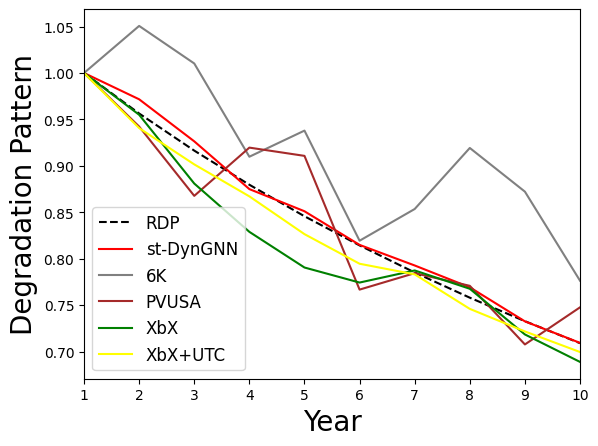

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
L = [[i] for i in range(1,11)]

# plot lines
plt.plot(L, RDP[12], label = "RDP", linestyle="--", color = 'black')
plt.plot(L, EDP[12], label = "st-DynGNN", linestyle="-", color = 'red')
# plt.plot(L, EDP_NF[12], label = "st-DynGNN-NF", linestyle="-", color = 'blue')
plt.plot(L, EDP_6K[0], label = "6K", linestyle="-", color = 'grey')
plt.plot(L, EDP_PVUSA[0], label = "PVUSA", linestyle="-", color = 'brown')
plt.plot(L, EDP_XbX[0], label = "XbX", linestyle="-", color = 'green')
plt.plot(L, correction[0], label = "XbX+UTC", linestyle="-", color = 'yellow')
# plt.plot(L, PLR_KDD[12], label = "QP-Aging-Detect", linestyle="-", color = 'purple')
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Degradation Pattern',fontsize = 20)
# plt.plot(L, h_f[15].detach().numpy(), label = "Fluctuation", linestyle="-.", color = 'black')
plt.legend(fontsize = 12)
plt.margins(x=0)
plt.savefig("gdrive/My Drive/Wavelet_GNN_PLR/Case3_RDP_EDP_new.png",transparent=True, dpi=1000)
plt.show()

In [ ]:
df_case3 = pd.DataFrame()
df_case3['RDP']= RDP[12]
df_case3['st-DynGNN']=EDP[12]
df_case3['6K'] = EDP_6K[0]
df_case3['PVUSA'] = EDP_PVUSA[0]
df_case3['XbX'] = EDP_XbX[0]
df_case3['XbX+UTC'] = correction[0]

In [ ]:
df_case3.to_csv('gdrive/My Drive/Wavelet_GNN_PLR/Case3_Coefficients.csv')

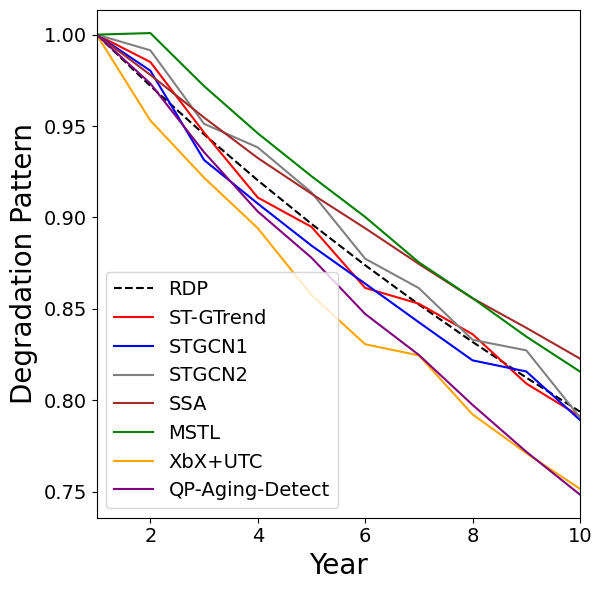

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# create data
L = [[i] for i in range(1,11)]

# plot lines
plt.figure(figsize=(6, 6))
plt.plot(L, RDP[0], label = "RDP", linestyle="--", color = 'black')
plt.plot(L, EDP[0], label = "ST-GTrend", linestyle="-", color = 'red')
plt.plot(L, EDP_STGCN1[0], label = "STGCN1", linestyle="-", color = 'blue')
plt.plot(L, EDP_STGCN2[0], label = "STGCN2", linestyle="-", color = 'grey')
plt.plot(L, EDP_SSA[0], label = "SSA", linestyle="-", color = 'brown')
plt.plot(L, EDP_MSTL[0], label = "MSTL", linestyle="-", color = 'green')
plt.plot(L, correction[12], label = "XbX+UTC", linestyle="-", color = 'orange')
plt.plot(L, PLR_KDD[0], label = "QP-Aging-Detect", linestyle="-", color = 'purple')
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Degradation Pattern',fontsize = 20)

formatter = ticker.StrMethodFormatter("{x:0.2f}")
plt.gca().yaxis.set_major_formatter(formatter)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize = 14)
plt.tight_layout()
plt.margins(x=0)
plt.savefig("gdrive/My Drive/Wavelet_GNN_PLR/Case3_RDP_EDP_new_ST.png",transparent=True, dpi=300)
plt.show()

In [ ]:
data = {
    'Year': [i[0] for i in L],
    'RDP': RDP[0],
    'ST-trend-GNN': EDP[0],
    'STGCN1': EDP_STGCN1[0],
    'STGCN2': EDP_STGCN2[0],
    'SSA': EDP_SSA[0],
    'MSTL': EDP_MSTL[0],
    'XbX+UTC': correction[12],
    'QP-Aging-Detect': PLR_KDD[0],
}

df = pd.DataFrame(data)

# Print or use the DataFrame as needed
df.to_csv("gdrive/My Drive/Wavelet_GNN_PLR/Case3_Results_All.csv", index=False)

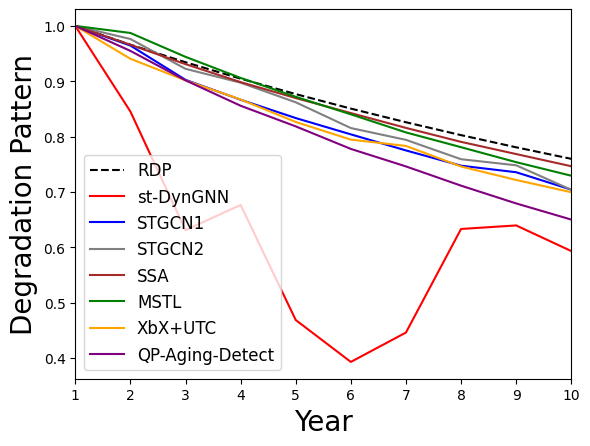

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
L = [[i] for i in range(1,11)]

# plot lines
plt.plot(L, RDP[12], label = "RDP", linestyle="--", color = 'black')
plt.plot(L, EDP[12], label = "st-DynGNN", linestyle="-", color = 'red')
plt.plot(L, EDP_STGCN1[12], label = "STGCN1", linestyle="-", color = 'blue')
plt.plot(L, EDP_STGCN2[12], label = "STGCN2", linestyle="-", color = 'grey')
plt.plot(L, EDP_SSA[12], label = "SSA", linestyle="-", color = 'brown')
plt.plot(L, EDP_MSTL[12], label = "MSTL", linestyle="-", color = 'green')
plt.plot(L, correction[0], label = "XbX+UTC", linestyle="-", color = 'orange')
plt.plot(L, PLR_KDD[12], label = "QP-Aging-Detect", linestyle="-", color = 'purple')
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Degradation Pattern',fontsize = 20)
# plt.plot(L, h_f[15].detach().numpy(), label = "Fluctuation", linestyle="-.", color = 'black')
plt.legend(fontsize = 12)
plt.margins(x=0)
plt.savefig("gdrive/My Drive/Wavelet_GNN_PLR/Case3_RDP_EDP_new.png",transparent=True, dpi=300)
plt.show()

In [ ]:
output_PLR = [((1-4*value)*(1+8*value)-1)/10 for value in PLR]
output = [(1-2*value*2)*(1+8*value) for value in PLR]
output_PLR

[-0.015016863407392,
 -0.014581208439072003,
 -0.013836959491199997,
 -0.02254438829260801,
 -0.016892119199872,
 -0.024461151202431995,
 -0.024054875289888,
 -0.026482048276992,
 -0.034333545343488,
 -0.027755641702432,
 -0.024391919710751987,
 -0.013322977363072008,
 -0.010504001863200007,
 -0.009546393628799998,
 -0.011112961670271992,
 -0.009917083086112,
 -0.00921225755699201,
 -0.009508905503232001,
 -0.008283400230912008,
 -0.013138585606431996,
 -0.009844345100799989,
 -0.009452786136192003,
 -0.007422338402847994,
 -0.008166586255872011,
 -0.010984490952832004,
 -0.006764417632800013,
 -0.008485196071967993,
 -0.011248729292799997,
 -0.010556776082208008,
 -0.009413312174112,
 -0.010280224011552009,
 -0.008583939971199994,
 -0.006800933020800004,
 -0.006481671436800007,
 -0.007299112157472009,
 -0.007772247955968014,
 -0.009265482420000004,
 -0.01124283024412801,
 -0.010641547418111996,
 -0.00896120715519999,
 -0.005551444705312003,
 -0.006989472364672,
 -0.00553721922,
 -0.00

In [ ]:
x[1,:]

tensor([48.5997, 46.5133, 50.7852, 45.7758, 42.3501, 40.6713, 37.9650, 37.7025,
        42.9385, 48.8072, 53.7933, 45.2931, 53.9314, 47.9271, 52.9615, 49.7650,
        44.1312, 45.0068, 38.8026, 40.3549, 44.6597, 50.4975, 56.6822, 50.6471,
        54.5450, 47.9481, 56.5066, 52.5406, 46.6095, 44.4115, 40.3755, 41.2493,
        41.5526, 48.4323, 56.8162, 50.9640, 51.1432, 47.2770, 54.7615, 52.6335,
        46.0449, 43.1812, 40.1660, 41.2111, 39.3135, 44.2599, 55.1408, 50.5227,
        48.2954, 52.1927, 48.4407, 51.5254, 46.9574, 42.2927, 39.0019, 39.8385,
        38.2593, 41.1204, 54.5212, 49.7491, 47.8857, 49.1848, 46.0699, 51.1053,
        46.1929, 41.5256, 39.3134, 37.4236, 37.3303, 42.5246, 48.8134, 47.8152,
        44.8830, 48.4282, 46.0078, 49.8685, 44.6307, 40.9975, 39.0901, 36.2221,
        35.7222, 40.3888, 45.5802, 49.8876, 41.7070, 49.3064, 43.5012, 47.7367,
        44.5472, 39.2325, 39.7285, 34.0097, 35.1321, 38.6018, 43.3393, 48.3176,
        42.8733, 45.9204, 40.3390, 47.51

In [ ]:
plt.plot((x[1]).detach().numpy())

NameError: ignored

In [ ]:
PLR_matrix[:,1]
# list_PLR = PLR_matrix[:,1]
list_PLR = x[1,:]
PLR_array = []
for i in range(108):
  PLR_array.append(((list_PLR[i+12]-list_PLR[i])/list_PLR[i]).detach().numpy())
PLR_array

[array(0.10970708, dtype=float32),
 array(0.03039652, dtype=float32),
 array(0.04285363, dtype=float32),
 array(0.08714645, dtype=float32),
 array(0.04205647, dtype=float32),
 array(0.10659851, dtype=float32),
 array(0.02206165, dtype=float32),
 array(0.07034994, dtype=float32),
 array(0.04008447, dtype=float32),
 array(0.03463258, dtype=float32),
 array(0.05370394, dtype=float32),
 array(0.1182075, dtype=float32),
 array(0.01137681, dtype=float32),
 array(0.00043888, dtype=float32),
 array(0.06693698, dtype=float32),
 array(0.05577524, dtype=float32),
 array(0.05615729, dtype=float32),
 array(-0.01322695, dtype=float32),
 array(0.04053684, dtype=float32),
 array(0.02216236, dtype=float32),
 array(-0.06957265, dtype=float32),
 array(-0.04089655, dtype=float32),
 array(0.00236343, dtype=float32),
 array(0.00625624, dtype=float32),
 array(-0.06236607, dtype=float32),
 array(-0.01399742, dtype=float32),
 array(-0.03088327, dtype=float32),
 array(0.00176843, dtype=float32),
 array(-0.01211

Text(0, 0.5, 'Probability Density')

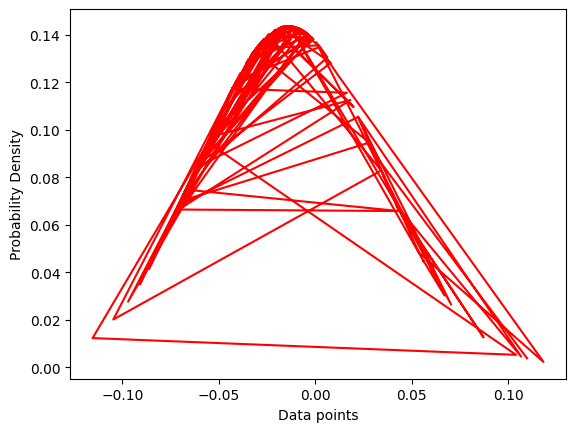

In [ ]:
# Importing required libraries

import numpy as np
import matplotlib.pyplot as plt

# Creating a series of data of in range of 1-50.
x = PLR_array

#Creating a Function.
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

#Calculate mean and Standard deviation.
mean = np.mean(x)
sd = np.std(x)

#Apply function to the data.
pdf = normal_dist(x,mean,sd)

#Plotting the Results
plt.plot(x,pdf , color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')

In [ ]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 52.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch-geometric-temporal 0.54.0 requires pandas<=1.3.5, but you have pandas 2.0.1 which is incompatible.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.


In [ ]:
numpy_array = (h_a.T).detach().numpy()
df = pd.DataFrame(numpy_array)
df.columns = PLR
df.to_csv('gdrive/My Drive/Wavelet_GNN_PLR/Aging_Part.csv')

In [ ]:
df

,-0.030231,-0.029494,-0.028221,-0.042149,-0.033339,-0.044973,-0.044380,-0.047872,-0.058477,-0.049660,...,-0.035811,-0.014470,-0.015804,-0.012024,-0.012684,-0.014237,-0.012207,-0.013680,-0.009792,-0.011249
0,45.440254,45.433338,45.421387,45.552082,45.469421,45.578598,45.573029,45.605804,45.705376,45.622601,...,41.621029,41.448296,41.459103,41.428497,41.433826,41.446396,41.429970,41.441902,41.410427,41.422226
1,45.382092,45.372089,45.354786,45.543930,45.424282,45.582279,45.574234,45.621647,45.765659,45.645931,...,42.010040,41.748245,41.764614,41.718231,41.726318,41.745380,41.720493,41.738541,41.690861,41.708733
2,43.994652,43.977318,43.947353,44.275085,44.067776,44.341530,44.327583,44.409744,44.659317,44.451832,...,41.356983,40.909863,40.937805,40.858597,40.872425,40.904957,40.862438,40.893284,40.811836,40.842365
3,44.047443,44.024807,43.985695,44.413506,44.142891,44.500256,44.482059,44.589317,44.915134,44.644257,...,41.505325,40.908604,40.945896,40.840202,40.858635,40.902073,40.845306,40.886486,40.777794,40.818531
4,43.853275,43.825371,43.777168,44.304504,43.970940,44.411423,44.389004,44.521187,44.922737,44.588905,...,40.929523,40.194141,40.240120,40.109863,40.132572,40.186108,40.116154,40.166901,40.032948,40.083153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,36.831860,36.926357,37.089554,35.303886,36.433426,34.941875,35.017799,34.570190,33.210476,34.340893,...,33.858959,36.440868,36.279499,36.736847,36.657070,36.469154,36.714706,36.536541,37.006870,36.830589
116,36.066345,36.162056,36.327324,34.518944,35.662846,34.152336,34.229233,33.775944,32.399021,33.543747,...,33.902370,36.509914,36.346935,36.808826,36.728268,36.538483,36.786469,36.606522,37.081532,36.903500
117,35.361717,35.457581,35.623116,33.811749,34.957554,33.444519,33.521545,33.067482,31.688183,32.834885,...,33.952312,36.574734,36.410824,36.875347,36.794331,36.603455,36.852867,36.671898,37.149609,36.970558
118,35.840500,35.934830,36.097740,34.315186,35.442764,33.953804,34.029602,33.582771,32.225456,33.353878,...,33.816921,36.398998,36.237617,36.694992,36.615211,36.427277,36.672852,36.494671,36.965027,36.788738


In [ ]:
((1+2*2*0.0294939)*(1-8*0.0294939)-1)/10

-0.014581208439072003

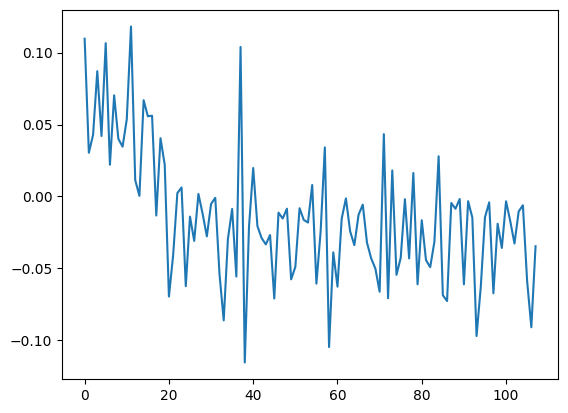

In [ ]:
np.mean(PLR_array)
from matplotlib import pyplot as plt
plt.plot(PLR_array)
plt.show()

In [ ]:
len(PLR_matrix[:,1])

120

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(output_PLR, PLR_derived)
y_true, y_pred = np.array(output_PLR), np.array(PLR_derived)
print("PLR MAE of 100 simulated inverters is: "+ str(error))
print("PLR MAPE of 100 simulated inverters is: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

PLR MAE of 100 simulated inverters is: 0.004415694590383514
PLR MAPE of 100 simulated inverters is: 29.361330255529573%


In [ ]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(PLR, PLR_derived)
y_true, y_pred = np.array(PLR), np.array(PLR_derived)
print("PLR MAE of 100 simulated inverters is: "+ str(error))
print("PLR MAPE of 100 simulated inverters is: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

PLR MAE of 100 simulated inverters is: 0.00030562381222692877
PLR MAPE of 100 simulated inverters is: 11.159017718388412%


In [ ]:
df = pd.DataFrame(columns=["PLR_Pred", "Ground_Truth"])
df["PLR_Pred"] = y_pred
df["Ground_Truth"] = y_true
df.to_csv("gdrive/My Drive/Wavelet_GNN_PLR/PLR_Pred.csv",index=False)

In [ ]:
pip install pandas --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 64.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch-geometric-temporal 0.54.0 requires pandas<=1.3.5, but you have pandas 2.0.1 which is incompatible.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.


In [ ]:
y_pred[80:100]

array([-0.00335599, -0.00324743, -0.00308648, -0.00314634, -0.00351934,
       -0.00415659, -0.00387217, -0.00563273, -0.00678621, -0.00541384,
       -0.00571872, -0.00492788, -0.00595539, -0.0072596 , -0.00675968,
       -0.0074195 , -0.00801351, -0.01031323, -0.01000564, -0.00822212],
      dtype=float32)

In [ ]:
y_true[80:100]

array([-0.003575 , -0.0034845, -0.0033507, -0.0034002, -0.0037113,
       -0.0042431, -0.0040057, -0.0054764, -0.0064417, -0.0052934,
       -0.0055483, -0.0048872, -0.0057463, -0.0068382, -0.0064195,
       -0.0069722, -0.0074702, -0.0093998, -0.0091428, -0.0076451])

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(PLR, PLR_derived)
y_true, y_pred = np.array(PLR), np.array(PLR_derived)
y_pred = y_pred[60:80]
y_true = y_true[60:80]
print("PLR MAE of 100 simulated inverters is: "+ str(error))
print("PLR MAPE of 100 simulated inverters is: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

PLR MAE of 100 simulated inverters is: 0.00030562381222692877
PLR MAPE of 100 simulated inverters is: 13.589945011763682%


In [ ]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(PLR, PLR_derived)
y_true, y_pred = np.array(PLR), np.array(PLR_derived)
print("PLR MAE of 100 simulated inverters is: "+str(error))
print("PLR MAPE of 100 simulated inverters is: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

PLR MAE of 100 simulated inverters is: 0.027986674755683776
PLR MAPE of 100 simulated inverters is: 599.9711138683679%
